In [1]:
import pandas as pd
import numpy as np
import json

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
clicks = pd.read_csv("../../sample_clicks.csv")

In [3]:
def ImpressionParser(data):
    return json.loads(data.replace("'", '"'))

bid_requests = pd.read_csv("../../sample_bid_requests.csv", converters={'bidRequest_imp': ImpressionParser})

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (39,40,65) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
def get_column(entry, colname):
    if colname in entry.keys():
        return entry[colname]
    else:
        return None

def get_column_l2(entry, colname1, colname2):
    if colname1 in entry.keys() and colname2 in entry[colname1].keys():
        return entry[colname1][colname2]
    else:
        return None
    
def get_column_l3(entry, colname1, colname2, colname3):
    if colname1 in entry.keys() and colname2 in entry[colname1].keys() and colname3 in entry[colname1][colname2].keys():
        return entry[colname1][colname2][colname3]
    else:
        return None

def get_type(entry):
    if 'video' in entry.keys() and 'banner' in entry.keys():
        return 'video,banner'
    elif 'video' in entry.keys():
        return 'video'
    elif 'banner' in entry.keys():
        return 'banner'
    else:
        return None
    
bid_requests['bidRequest_imp_type'] = bid_requests['bidRequest_imp'].apply(lambda x: get_type(x[0]))
    
bid_requests['bidRequest_imp_id'] = bid_requests['bidRequest_imp'].apply(lambda x: get_column(x[0], 'id'))
bid_requests['bidRequest_imp_instl'] = bid_requests['bidRequest_imp'].apply(lambda x: get_column(x[0], 'instl'))
bid_requests['bidRequest_imp_bidfloor'] = bid_requests['bidRequest_imp'].apply(lambda x: x[0]['bidfloor'])
bid_requests['bidRequest_imp_displaymanager'] = bid_requests['bidRequest_imp'].apply(lambda x: get_column(x[0], "displaymanager"))
bid_requests['bidRequest_imp_displaymanagerver'] = bid_requests['bidRequest_imp'].apply(lambda x: get_column(x[0], "displaymanagerver"))
bid_requests['bidRequest_imp_tagid'] = bid_requests['bidRequest_imp'].apply(lambda x: get_column(x[0], "tagid"))
bid_requests['bidRequest_imp_secure'] = bid_requests['bidRequest_imp'].apply(lambda x: get_column(x[0], "secure"))

bid_requests['bidRequest_imp_video_linearity'] = bid_requests['bidRequest_imp'].apply(lambda x: get_column_l2(x[0], "video", "linearity"))
bid_requests['bidRequest_imp_video_w'] = bid_requests['bidRequest_imp'].apply(lambda x: get_column_l2(x[0], "video", "w"))
bid_requests['bidRequest_imp_video_h'] = bid_requests['bidRequest_imp'].apply(lambda x: get_column_l2(x[0], "video", "h"))
bid_requests['bidRequest_imp_video_minduration'] = bid_requests['bidRequest_imp'].apply(lambda x: get_column_l2(x[0], "video", "minduration"))
bid_requests['bidRequest_imp_video_maxduration'] = bid_requests['bidRequest_imp'].apply(lambda x: get_column_l2(x[0], "video", "maxduration"))
bid_requests['bidRequest_imp_video_maxbitrate'] = bid_requests['bidRequest_imp'].apply(lambda x: get_column_l2(x[0], "video", "maxbitrate"))
bid_requests['bidRequest_imp_video_mimes'] = bid_requests['bidRequest_imp'].apply(lambda x: str(get_column_l2(x[0], "video", "mimes")))
bid_requests['bidRequest_imp_video_startdelay'] = bid_requests['bidRequest_imp'].apply(lambda x: get_column_l2(x[0], "video", "startdelay"))
bid_requests['bidRequest_imp_video_pos'] = bid_requests['bidRequest_imp'].apply(lambda x: get_column_l2(x[0], "video", "pos"))
bid_requests['bidRequest_imp_video_api'] = bid_requests['bidRequest_imp'].apply(lambda x: str(get_column_l2(x[0], "video", "api")))
bid_requests['bidRequest_imp_video_battr'] = bid_requests['bidRequest_imp'].apply(lambda x: str(get_column_l2(x[0], "video", "battr")))
bid_requests['bidRequest_imp_video_companiontype'] = bid_requests['bidRequest_imp'].apply(lambda x: str(get_column_l2(x[0], "video", "companiontype")))
bid_requests['bidRequest_imp_video_protocols'] = bid_requests['bidRequest_imp'].apply(lambda x: str(get_column_l2(x[0], "video", "protocols")))
bid_requests['bidRequest_imp_video_playbackmethod'] = bid_requests['bidRequest_imp'].apply(lambda x: str(get_column_l2(x[0], "video", "playbackmethod")))
bid_requests['bidRequest_imp_video_ext_skipoffset'] = bid_requests['bidRequest_imp'].apply(lambda x: get_column_l3(x[0], "video", "ext", "skipoffset"))
bid_requests['bidRequest_imp_video_ext_skippable'] = bid_requests['bidRequest_imp'].apply(lambda x: get_column_l3(x[0], "video", "ext", "skippable"))

bid_requests['bidRequest_imp_banner_api'] = bid_requests['bidRequest_imp'].apply(lambda x: str(get_column_l2(x[0], "banner", "api")))
bid_requests['bidRequest_imp_banner_w'] = bid_requests['bidRequest_imp'].apply(lambda x: get_column_l2(x[0], "banner", "w"))
bid_requests['bidRequest_imp_banner_h'] = bid_requests['bidRequest_imp'].apply(lambda x: get_column_l2(x[0], "banner", "h"))
bid_requests['bidRequest_imp_banner_pos'] = bid_requests['bidRequest_imp'].apply(lambda x: get_column_l2(x[0], "banner", "pos"))
bid_requests['bidRequest_imp_banner_battr'] = bid_requests['bidRequest_imp'].apply(lambda x: str(get_column_l2(x[0], "banner", "battr")))
bid_requests['bidRequest_imp_banner_btype'] = bid_requests['bidRequest_imp'].apply(lambda x: str(get_column_l2(x[0], "banner", "btype")))

bid_requests['bidRequest_imp_pmp_deals'] = bid_requests['bidRequest_imp'].apply(lambda x: str(get_column_l2(x[0], "pmp", "deals")))

bid_requests['bidRequest_imp_ext_brsrclk'] = bid_requests['bidRequest_imp'].apply(lambda x: get_column_l2(x[0], "ext", "brsrclk"))
bid_requests['bidRequest_imp_ext_dlp'] = bid_requests['bidRequest_imp'].apply(lambda x: get_column_l2(x[0], "ext", "dlp"))
bid_requests['bidRequest_imp_ext_nex_screen'] = bid_requests['bidRequest_imp'].apply(lambda x: get_column_l2(x[0], "ext", "nex_screen"))
bid_requests['bidRequest_imp_ext_nex_sd'] = bid_requests['bidRequest_imp'].apply(lambda x: get_column_l2(x[0], "ext", "nex_sd"))
#bid_requests['bidRequest_imp_ext_strictbannersize'] = bid_requests['bidRequest_imp'].apply(lambda x: get_column_l2(x[0], "ext", "strictbannersize"))

pd.options.display.max_columns = 150
bid_requests.head(10)

,Unnamed: 0,bidRequest_app_bundle,bidRequest_app_cat,bidRequest_app_domain,bidRequest_app_ext_nex_sdkv,bidRequest_app_id,bidRequest_app_keywords,bidRequest_app_name,bidRequest_app_publisher_ext_nex_else,bidRequest_app_publisher_id,bidRequest_app_publisher_name,bidRequest_app_storeurl,bidRequest_app_ver,bidRequest_at,bidRequest_badv,bidRequest_bcat,bidRequest_device_carrier,bidRequest_device_connectiontype,bidRequest_device_devicetype,bidRequest_device_didmd5,bidRequest_device_didsha1,bidRequest_device_dnt,bidRequest_device_dpidmd5,bidRequest_device_dpidsha1,bidRequest_device_geo_city,bidRequest_device_geo_country,bidRequest_device_geo_lat,bidRequest_device_geo_lon,bidRequest_device_geo_metro,bidRequest_device_geo_region,bidRequest_device_geo_type,bidRequest_device_geo_zip,bidRequest_device_h,bidRequest_device_hwv,bidRequest_device_ifa,bidRequest_device_ip,bidRequest_device_js,bidRequest_device_language,bidRequest_device_lmt,bidRequest_device_macmd5,bidRequest_device_macsha1,bidRequest_device_make,bidRequest_device_model,bidRequest_device_os,bidRequest_device_osv,bidRequest_device_ppi,bidRequest_device_ua,bidRequest_device_w,bidRequest_id,bidRequest_imp,bidRequest_regs_coppa,bidRequest_site_cat,bidRequest_site_domain,bidRequest_site_id,bidRequest_site_keywords,bidRequest_site_mobile,bidRequest_site_name,bidRequest_site_page,bidRequest_site_publisher_ext_nex_else,bidRequest_site_publisher_id,bidRequest_site_publisher_name,bidRequest_site_ref,bidRequest_user_ext_nex_dma,bidRequest_user_ext_nex_eth,bidRequest_user_ext_nex_hhi,bidRequest_user_ext_nex_marital,bidRequest_user_gender,bidRequest_user_geo_city,bidRequest_user_geo_country,bidRequest_user_geo_region,bidRequest_user_geo_type,bidRequest_user_geo_zip,bidRequest_user_id,bidRequest_user_keywords,bidRequest_user_yob,exchange,timestamp,bidRequest_imp_type,bidRequest_imp_id,bidRequest_imp_instl,bidRequest_imp_bidfloor,bidRequest_imp_displaymanager,bidRequest_imp_displaymanagerver,bidRequest_imp_tagid,bidRequest_imp_secure,bidRequest_imp_video_linearity,bidRequest_imp_video_w,bidRequest_imp_video_h,bidRequest_imp_video_minduration,bidRequest_imp_video_maxduration,bidRequest_imp_video_maxbitrate,bidRequest_imp_video_mimes,bidRequest_imp_video_startdelay,bidRequest_imp_video_pos,bidRequest_imp_video_api,bidRequest_imp_video_battr,bidRequest_imp_video_companiontype,bidRequest_imp_video_protocols,bidRequest_imp_video_playbackmethod,bidRequest_imp_video_ext_skipoffset,bidRequest_imp_video_ext_skippable,bidRequest_imp_banner_api,bidRequest_imp_banner_w,bidRequest_imp_banner_h,bidRequest_imp_banner_pos,bidRequest_imp_banner_battr,bidRequest_imp_banner_btype,bidRequest_imp_pmp_deals,bidRequest_imp_ext_brsrclk,bidRequest_imp_ext_dlp,bidRequest_imp_ext_nex_screen,bidRequest_imp_ext_nex_sd
0,0,com.sgiggle.production,"['IAB9', 'IAB14']",tango.me,NaN,96370,NaN,Tango Android,0.0,25533,Tango,https://play.google.com/store/apps/details?id=...,NaN,2,NaN,NaN,WIFI,2.0,4.0,NaN,NaN,0.0,NaN,NaN,SAN ANTONIO,USA,29.485300,-98.575600,641.0,TX,1.0,78229,NaN,NaN,3d98a7bf-fe4f-4eb2-a203-400ea4ab9f28,72.177.132.31,1.0,NaN,0.0,NaN,NaN,NaN,NaN,Android,4.4.4,NaN,Mozilla/5.0 (Linux; Android 4.4.4; Z987 Build/...,NaN,ec44f3d8-5e21-49df-9849-5382abe69a07,[{'pmp': {'deals': [{'id': '147200172401291276...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,3.0,78229,3d98a7bf-fe4f-4eb2-a203-400ea4ab9f28,NaN,NaN,Nexage,1473813254000,video,ec44f3d8-5e21-49df-9849-5382abe69a07-1,0.0,12.50,web,None,None,NaN,1.0,300.0,250.0,0.0,30.0,1200.0,"['video/mp4', 'video/3gpp']",0.0,7.0,None,None,None,"[5, 2]","[1, 2, 3]",7.0,1.0,None,NaN,NaN,NaN,None,None,[{'id': '1472001724012912764'}],NaN,NaN,0.0,NaN
1,1,com.myyearbook.m,['IAB14'],meetme.com,6.1.0-5323db4.a,70578,NaN,myyearbook Android,0.0,19982,myYearbook.com,http://www.meetme.com/,NaN,2,"['clover.co', 'iamnaughty.com', 'skout.com', '...","['IAB8-5', 'IAB8-18', 'IAB14-1', 'IAB26', 'IAB...",VERIZON,3.0,4.0,NaN,NaN,0.0,NaN,NaN,CHELMSFORD,USA,42.592700,-71.

In [5]:
for c in bid_requests.columns:
    print(c)

Unnamed: 0
bidRequest_app_bundle
bidRequest_app_cat
bidRequest_app_domain
bidRequest_app_ext_nex_sdkv
bidRequest_app_id
bidRequest_app_keywords
bidRequest_app_name
bidRequest_app_publisher_ext_nex_else
bidRequest_app_publisher_id
bidRequest_app_publisher_name
bidRequest_app_storeurl
bidRequest_app_ver
bidRequest_at
bidRequest_badv
bidRequest_bcat
bidRequest_device_carrier
bidRequest_device_connectiontype
bidRequest_device_devicetype
bidRequest_device_didmd5
bidRequest_device_didsha1
bidRequest_device_dnt
bidRequest_device_dpidmd5
bidRequest_device_dpidsha1
bidRequest_device_geo_city
bidRequest_device_geo_country
bidRequest_device_geo_lat
bidRequest_device_geo_lon
bidRequest_device_geo_metro
bidRequest_device_geo_region
bidRequest_device_geo_type
bidRequest_device_geo_zip
bidRequest_device_h
bidRequest_device_hwv
bidRequest_device_ifa
bidRequest_device_ip
bidRequest_device_js
bidRequest_device_language
bidRequest_device_lmt
bidRequest_device_macmd5
bidRequest_device_macsha1
bidRequest_d

In [6]:
impressions = pd.read_csv("../../sample_impressions.csv")

In [7]:
pd.options.display.max_columns = 100
clicks.head()

,Unnamed: 0,ad,adSize,adType,age,backendStatus,bestVenueName,bidPrice,campaign,carrier,country,day,deviceName,deviceType,dimensions,elbStatus,exchange,gender,iabCategories,impId,landingPage,location,month,os,path,region,state,targetGroup,timestamp,udid,venueType,year,zip
0,0,17183,320x50,3rd Party Tag,NaN,200,Myyearbook.com-meetme android-320x50-us only,3.00,1746,T-MOBILE,usa,10,lg,4,eJwlULtuwzAM_BWDs-RYL4vy1gAdAjRohwwFkg6KLbtB_I...,200,nexage,NaN,['IAB14'],af830061-7b3f-4efa-a612-c3ca76bbb397,http://kirklands.com,"[26.157688, -97.82809]",9,android,/rtb2/click,TX,usa-tx,24981,2016-09-10 14:17:04.591,9581192c-778f-424a-845b-e9f3d9cfceea,app,2016,78559
1,1,14608,320x50,3rd Party Tag,NaN,200,Myyearbook.com-meetme_ios_320x50_new,4.50,1604,WIFI,usa,10,apple iphone,4,eJxFkttq3DAQhl9l0YWvZFsny_YGU7yHFEPTFBroxToYxV...,200,nexage,NaN,['IAB14'],f7e703fa-4eb7-44b2-80b5-1a6c108f39f2,https://trkn.us/click/?partner=700&c=2532&p=12...,"[33.7566, -84.3894]",9,ios,/rtb2/click,GA,usa-ga,21219,2016-09-10 14:17:25.949,507C092D-FBA8-4135-ADE4-A9C0AEBC6D0D,app,2016,30303
2,2,13569,320x50,3rd Party Tag,NaN,200,Myyearbook android,3.00,1534,WIFI,usa,10,NaN,4,eJw9UU1vwjAM_SvIB05pSdO0aZCqaR9M44CYEBuHMaG0MV...,200,nexage,NaN,['IAB14'],b98f47a6-9e17-4e64-8dbf-337dc2f8a63a,http://s-cdn-tag.medialytics.com/clk?type=r&ta...,"[38.9242, -79.8508]",9,android,/rtb2/click,WV,usa-wv,19707,2016-09-10 14:18:14.283,4c17dea9-5e49-4472-8ddd-8db637894b26,app,2016,26241
3,3,17175,320x50,3rd Party Tag,NaN,200,Myyearbook.com-meetme android-320x50-us only,4.50,1746,WIFI,usa,10,NaN,4,eJwlUMtugzAQ_BW05zXxExtu7aFSDq16iNRD0oMTDEUYiM...,200,nexage,NaN,['IAB14'],55046e26-6129-4619-936c-f64c70929290,http://kirklands.com,"[35.075863, -89.94052]",9,android,/rtb2/click,TN,usa-tn,24968,2016-09-10 14:18:20.515,a01d4e16-ac8f-4284-b792-f0a15830bd53,app,2016,38118
4,4,16156,320x50,3rd Party Tag,28.0,200,Grindr android,5.25,1719,T-MOBILE,usa,10,htc htc 10,4,eJw9UUtPwkAQ_itkDj1ty85unySNoUENiSgRDhrw0G4Lrr...,200,mopub,M,"['IAB1', 'IAB24']",31c5ab8c-91b5-409d-86d4-f3a9d83587de,https://bs.serving-sys.com/BurstingPipe/adServ...,"[30.339281, -97.698097]",9,android,/rtb2/click,TX,usa-tx,23411,2016-09-10 14:19:00.772,ece0d2d1-5cd9-460b-94f2-723b32b3120b,app,2016,78728


In [8]:
clicks.columns

Index(['Unnamed: 0', 'ad', 'adSize', 'adType', 'age', 'backendStatus',
       'bestVenueName', 'bidPrice', 'campaign', 'carrier', 'country', 'day',
       'deviceName', 'deviceType', 'dimensions', 'elbStatus', 'exchange',
       'gender', 'iabCategories', 'impId', 'landingPage', 'location', 'month',
       'os', 'path', 'region', 'state', 'targetGroup', 'timestamp', 'udid',
       'venueType', 'year', 'zip'],
      dtype='object')

In [9]:
missing_vals = pd.DataFrame(clicks.isnull().sum())
missing_vals['column'] = missing_vals.index
missing_vals['unique'] = [len(clicks[col].unique()) for col in clicks.columns]
missing_vals['na_count'] = missing_vals[0]
missing_vals['na_frac'] = clicks.isnull().sum()/len(clicks)
missing_vals = missing_vals.drop(0, axis=1)
missing_vals.index = range(len(missing_vals))
missing_vals

,column,unique,na_count,na_frac
0,Unnamed: 0,16243,0,0.000000
1,ad,412,0,0.000000
2,adSize,6,0,0.000000
3,adType,3,0,0.000000
4,age,70,31656,0.649634
5,backendStatus,1,0,0.000000
6,bestVenueName,1305,0,0.000000
7,bidPrice,42,0,0.000000
8,campaign,67,0,0.000000
9,carrier,63,4023,0.082559


Column:  ad
Unique values:  412 

17235    6513
16897    3639
4935     1008
14608     906
17236     891
17076     822
10672     783
16246     768
17181     762
14606     735
16237     726
15096     714
16904     687
16158     663
16915     627
14216     600
14605     573
16234     540
16909     513
13569     462
Name: ad, dtype: int64 



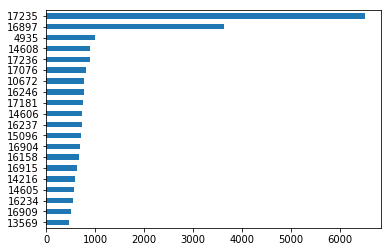

Column:  adSize
Unique values:  6 

320x50     24090
300x250    13728
320x480     9024
728x90      1779
480x320       96
666x333       12
Name: adSize, dtype: int64 



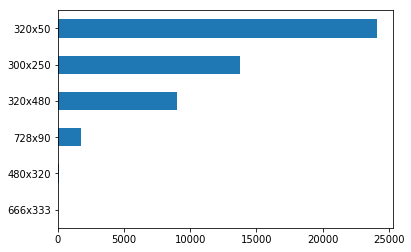

Column:  adType
Unique values:  3 

Rich media         26625
3rd Party Tag      19095
3rd party video     3009
Name: adType, dtype: int64 



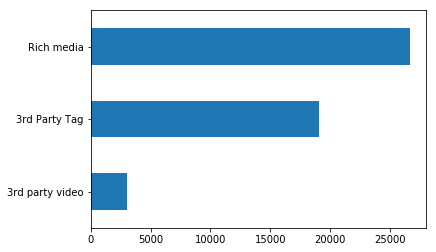

Column:  age
Unique values:  69 

21.0    1125
19.0     996
20.0     960
18.0     936
22.0     924
23.0     891
25.0     879
24.0     858
26.0     723
27.0     687
28.0     669
29.0     579
30.0     498
35.0     453
31.0     399
32.0     360
46.0     354
33.0     321
45.0     306
37.0     303
Name: age, dtype: int64 



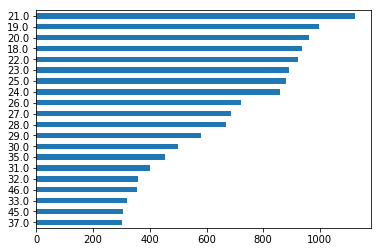

Column:  backendStatus
Unique values:  1 

200    48729
Name: backendStatus, dtype: int64 



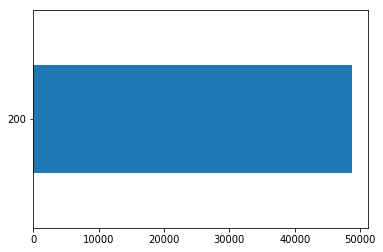

Column:  bestVenueName
Unique values:  1305 

Meetme - android_meetme_android_300x250_top of the waterfall_usa only_android_mediumrectangle_300x250_iab1,iab14    3927
Grindr ios                                                                                                          1917
Myyearbook.com-meetme android-320x50-us only                                                                        1782
Adme_adme_lockscreen_320x480_android_tier3_android_iab_full_screen_320x480_iab1                                     1722
Grindr android                                                                                                      1620
Words with friends 2 android                                                                                        1605
Meetme - iphone_meetme_ios_300x250_tier3_ios_mediumrectangle_300x250_iab1                                           1065
Meetme iphone 320x50 us only                                                                               

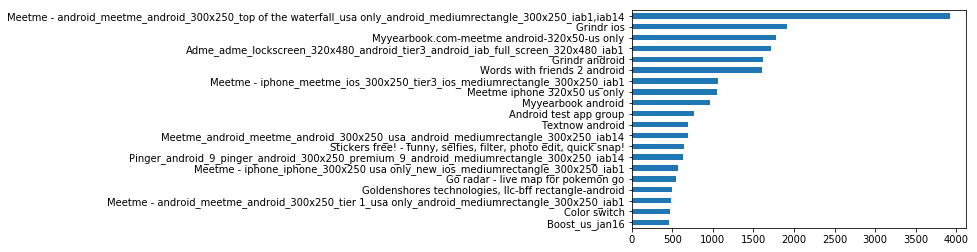

Column:  bidPrice
Unique values:  42 

3.00     17640
4.50      9654
4.00      4272
12.00     3051
1.50      1902
3.50      1659
6.00      1647
9.00      1560
5.25      1242
8.00      1200
10.00     1056
8.50      1023
5.00       543
8.60       540
2.00       465
0.50       300
1.00       216
1.75       153
11.00      114
13.50       96
Name: bidPrice, dtype: int64 



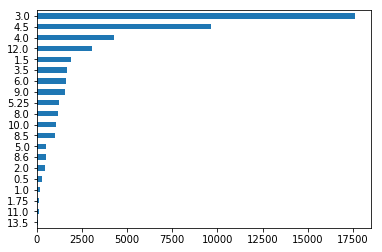

Column:  campaign
Unique values:  67 

1691    7980
1746    5259
1579    4812
1562    3576
1604    3147
1731    2886
1534    2400
1337    2220
725     1185
1642    1089
1507     945
1341     927
1720     900
1766     813
1757     762
1688     732
1648     714
1536     633
1760     627
1483     582
Name: campaign, dtype: int64 



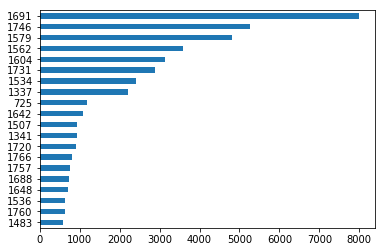

Column:  carrier
Unique values:  62 

UNKNOWN - PROBABLY WLAN                        15072
T-MOBILE                                        6645
WIFI                                            6477
AT&T                                            3771
VERIZON                                         3609
SPRINT                                          2208
WLAN                                            1257
VERIZON WIRELESS                                1098
BOOST                                            906
SPRINT NEXTEL                                    858
AT&T MOBILITY                                    843
ROGERS WIRELESS                                  453
TELUS MOBILITY, KOODO MOBILE, PUBLIC MOBILE      279
BELL MOBILITY, VIRGIN MOBILE CANADA              267
U.S. CELLULAR                                    141
FIDO                                             129
SERVICE PROVIDER CORPORATION                     114
WIND MOBILE                                      111
BELL MOB

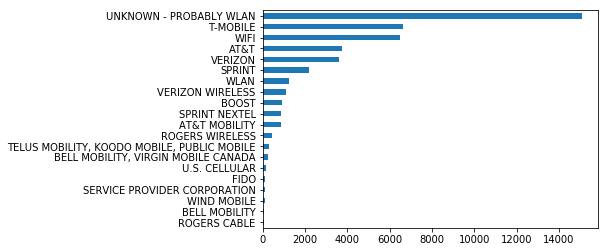

Column:  country
Unique values:  3 

usa    46230
can     2487
br        12
Name: country, dtype: int64 



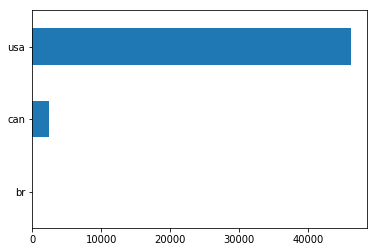

Column:  day
Unique values:  20 

20    5010
22    4992
10    4977
5     3957
4     3192
3     2931
11    2565
17    2346
7     2148
21    1983
6     1740
12    1671
8     1623
15    1587
9     1548
2     1497
14    1494
1     1437
13    1236
16     795
Name: day, dtype: int64 



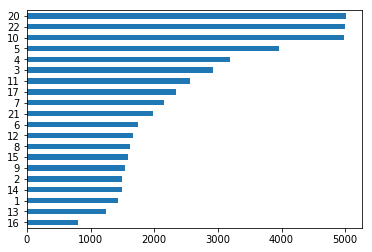

Column:  deviceName
Unique values:  1029 

apple iphone            11580
apple ipad               1764
generic android 2.0      1245
apple iphone 6            960
apple iphone 6s           792
apple iphone 5s           615
lg                        615
apple ipod touch          522
samsung sm-g920v          504
samsung sm-g900v          483
apple iphone 6s plus      414
lg ms330                  396
samsung sm-g730a          366
samsung sm-g930v          336
apple iphone 6 plus       327
samsung sm-g900t          303
samsung                   297
samsung sm-g900p          282
motorola xt1585           255
samsung sm-n920p          252
Name: deviceName, dtype: int64 



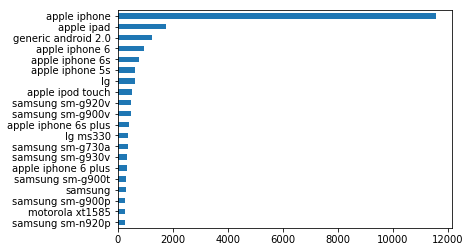

Column:  deviceType
Unique values:  3 

4    46269
5     2457
1        3
Name: deviceType, dtype: int64 



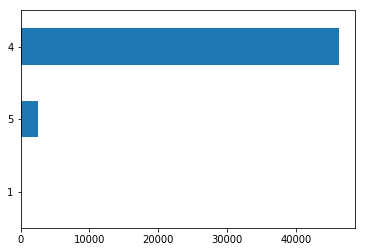

Column:  elbStatus
Unique values:  1 

200    48729
Name: elbStatus, dtype: int64 



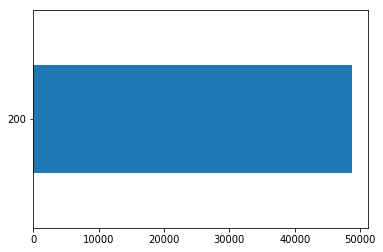

Column:  exchange
Unique values:  5 

smaato        21048
mopub         16149
nexage         8553
rubicon        2967
sitomobile       12
Name: exchange, dtype: int64 



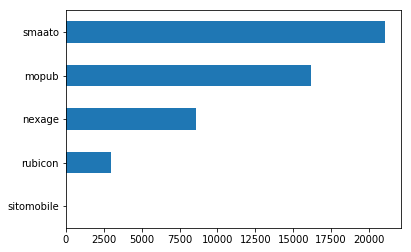

Column:  gender
Unique values:  2 

M    13896
F     5406
Name: gender, dtype: int64 



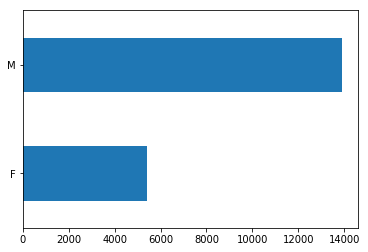

Column:  iabCategories
Unique values:  201 

['IAB14']                       8799
['IAB1']                        8799
['IAB1', 'IAB14']               4335
['IAB1', 'IAB9', 'IAB9-30']     3900
['IAB1', 'IAB24']               2838
['IAB9']                        2514
['IAB14', 'IAB24']              2040
['IAB1', 'IAB9']                1158
['IAB24', 'IAB3']               1014
['IAB24', 'IAB9', 'IAB9-23']     918
['IAB3']                         777
['IAB3', 'IAB9', 'IAB9-30']      576
['IAB24', 'IAB9', 'IAB9-30']     537
['IAB1', 'IAB1-6']               534
['IAB14', 'IAB3']                528
['IAB19', 'IAB19-8']             504
['IAB9-30', 'IAB9']              489
['IAB15']                        450
['IAB1-6', 'IAB1']               426
['IAB14-3', 'IAB14']             417
Name: iabCategories, dtype: int64 



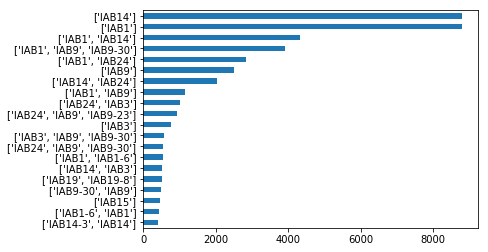

Column:  landingPage
Unique values:  168 

https://net10.com                                                                                                                                                                                                                                                                           7455
http://kirklands.com                                                                                                                                                                                                                                                                        5259
http://unwash.com                                                                                                                                                                                                                                                                           4812
http://ford.com                                                                           

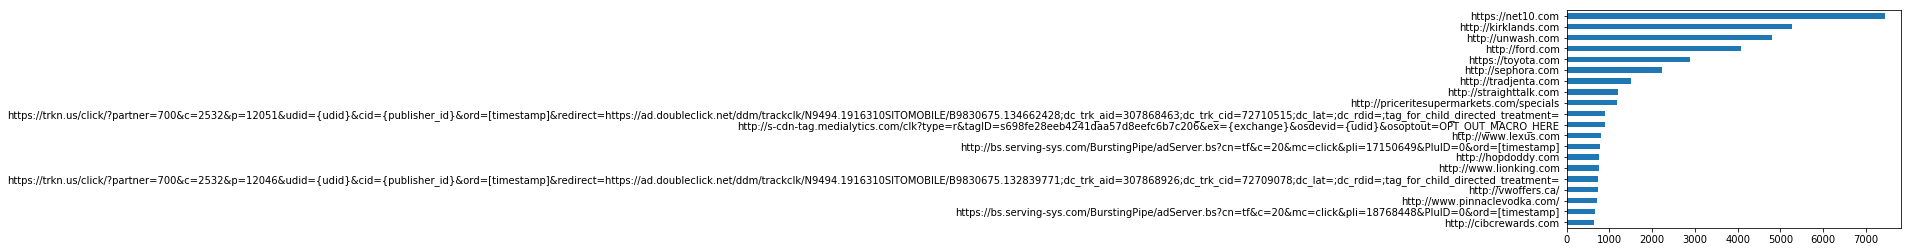

Column:  month
Unique values:  1 

9    48729
Name: month, dtype: int64 



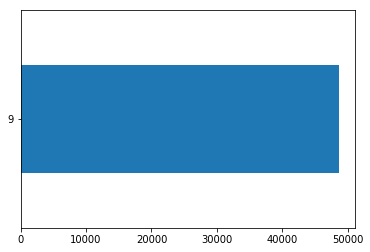

Column:  os
Unique values:  4 

android    30756
ios        17928
osx           12
unknown        6
Name: os, dtype: int64 



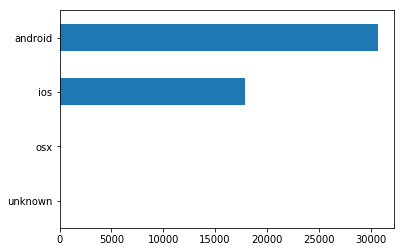

Column:  path
Unique values:  1 

/rtb2/click    48729
Name: path, dtype: int64 



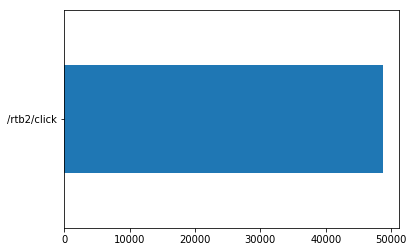

Column:  region
Unique values:  77 

TX    5841
CA    3939
NY    3480
IL    2136
FL    1707
PA    1521
GA    1422
OH    1317
VA    1308
NJ    1284
MO    1263
ON    1062
MA    1029
MD     951
IA     822
TN     807
KS     798
AZ     783
NE     714
MI     687
Name: region, dtype: int64 



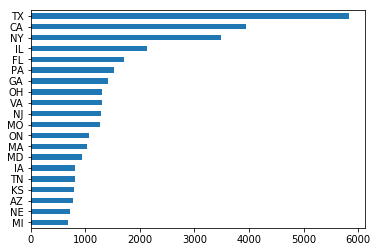

Column:  state
Unique values:  98 

usa-      6294
usa-tx    5823
usa-ca    3921
usa-ny    3405
usa-il    2130
usa-fl    1701
usa-pa    1521
usa-ga    1419
usa-oh    1314
usa-va    1308
usa-nj    1275
usa-mo    1257
can-on    1062
usa-ma    1029
usa-md     942
usa-ia     819
usa-tn     807
usa-ks     786
usa-az     780
usa-ne     714
Name: state, dtype: int64 



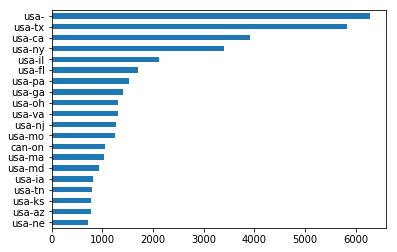

Column:  targetGroup
Unique values:  455 

25108    6513
24623    3639
8800     1008
21219     906
25113     891
24847     822
23617     768
21217     735
23613     726
23416     663
24638     624
20491     600
23634     576
21221     573
23622     540
24634     513
24956     465
19707     462
19716     456
25105     438
Name: targetGroup, dtype: int64 



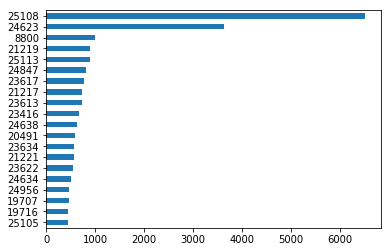

Column:  venueType
Unique values:  2 

app     48036
site      693
Name: venueType, dtype: int64 



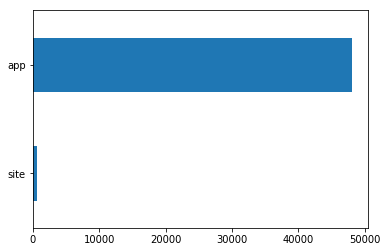

Column:  year
Unique values:  1 

2016    48729
Name: year, dtype: int64 



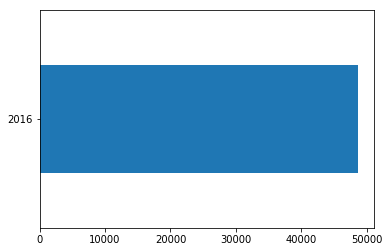

['Unnamed: 0', 'dimensions', 'impId', 'location', 'timestamp', 'udid', 'zip']


In [10]:
not_included = []

for column in clicks.columns:
    if type(clicks[column][0] != list) and len(clicks[column].value_counts()) < 2000:
        print("Column: ", column)
        print("Unique values: ", len(clicks[column].value_counts()), "\n")
        print(clicks[column].value_counts().head(20), "\n")
        plt.figure()
        clicks[column].value_counts().head(20).plot(kind='barh')
        plt.gca().invert_yaxis()
        plt.show()
    else:
        not_included.append(column)
        
print(not_included)

In [11]:
bid_requests.head()

,Unnamed: 0,bidRequest_app_bundle,bidRequest_app_cat,bidRequest_app_domain,bidRequest_app_ext_nex_sdkv,bidRequest_app_id,bidRequest_app_keywords,bidRequest_app_name,bidRequest_app_publisher_ext_nex_else,bidRequest_app_publisher_id,bidRequest_app_publisher_name,bidRequest_app_storeurl,bidRequest_app_ver,bidRequest_at,bidRequest_badv,bidRequest_bcat,bidRequest_device_carrier,bidRequest_device_connectiontype,bidRequest_device_devicetype,bidRequest_device_didmd5,bidRequest_device_didsha1,bidRequest_device_dnt,bidRequest_device_dpidmd5,bidRequest_device_dpidsha1,bidRequest_device_geo_city,bidRequest_device_geo_country,bidRequest_device_geo_lat,bidRequest_device_geo_lon,bidRequest_device_geo_metro,bidRequest_device_geo_region,bidRequest_device_geo_type,bidRequest_device_geo_zip,bidRequest_device_h,bidRequest_device_hwv,bidRequest_device_ifa,bidRequest_device_ip,bidRequest_device_js,bidRequest_device_language,bidRequest_device_lmt,bidRequest_device_macmd5,bidRequest_device_macsha1,bidRequest_device_make,bidRequest_device_model,bidRequest_device_os,bidRequest_device_osv,bidRequest_device_ppi,bidRequest_device_ua,bidRequest_device_w,bidRequest_id,bidRequest_imp,...,bidRequest_user_ext_nex_dma,bidRequest_user_ext_nex_eth,bidRequest_user_ext_nex_hhi,bidRequest_user_ext_nex_marital,bidRequest_user_gender,bidRequest_user_geo_city,bidRequest_user_geo_country,bidRequest_user_geo_region,bidRequest_user_geo_type,bidRequest_user_geo_zip,bidRequest_user_id,bidRequest_user_keywords,bidRequest_user_yob,exchange,timestamp,bidRequest_imp_type,bidRequest_imp_id,bidRequest_imp_instl,bidRequest_imp_bidfloor,bidRequest_imp_displaymanager,bidRequest_imp_displaymanagerver,bidRequest_imp_tagid,bidRequest_imp_secure,bidRequest_imp_video_linearity,bidRequest_imp_video_w,bidRequest_imp_video_h,bidRequest_imp_video_minduration,bidRequest_imp_video_maxduration,bidRequest_imp_video_maxbitrate,bidRequest_imp_video_mimes,bidRequest_imp_video_startdelay,bidRequest_imp_video_pos,bidRequest_imp_video_api,bidRequest_imp_video_battr,bidRequest_imp_video_companiontype,bidRequest_imp_video_protocols,bidRequest_imp_video_playbackmethod,bidRequest_imp_video_ext_skipoffset,bidRequest_imp_video_ext_skippable,bidRequest_imp_banner_api,bidRequest_imp_banner_w,bidRequest_imp_banner_h,bidRequest_imp_banner_pos,bidRequest_imp_banner_battr,bidRequest_imp_banner_btype,bidRequest_imp_pmp_deals,bidRequest_imp_ext_brsrclk,bidRequest_imp_ext_dlp,bidRequest_imp_ext_nex_screen,bidRequest_imp_ext_nex_sd
0,0,com.sgiggle.production,"['IAB9', 'IAB14']",tango.me,NaN,96370,NaN,Tango Android,0.0,25533,Tango,https://play.google.com/store/apps/details?id=...,NaN,2,NaN,NaN,WIFI,2.0,4.0,NaN,NaN,0.0,NaN,NaN,SAN ANTONIO,USA,29.485300,-98.575600,641.0,TX,1.0,78229,NaN,NaN,3d98a7bf-fe4f-4eb2-a203-400ea4ab9f28,72.177.132.31,1.0,NaN,0.0,NaN,NaN,NaN,NaN,Android,4.4.4,NaN,Mozilla/5.0 (Linux; Android 4.4.4; Z987 Build/...,NaN,ec44f3d8-5e21-49df-9849-5382abe69a07,[{'pmp': {'deals': [{'id': '147200172401291276...,...,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,3.0,78229,3d98a7bf-fe4f-4eb2-a203-400ea4ab9f28,NaN,NaN,Nexage,1473813254000,video,ec44f3d8-5e21-49df-9849-5382abe69a07-1,0.0,12.50,web,None,None,NaN,1.0,300.0,250.0,0.0,30.0,1200.0,"['video/mp4', 'video/3gpp']",0.0,7.0,None,None,None,"[5, 2]","[1, 2, 3]",7.0,1.0,None,NaN,NaN,NaN,None,None,[{'id': '1472001724012912764'}],NaN,NaN,0.0,NaN
1,1,com.myyearbook.m,['IAB14'],meetme.com,6.1.0-5323db4.a,70578,NaN,myyearbook Android,0.0,19982,myYearbook.com,http://www.meetme.com/,NaN,2,"['clover.co', 'iamnaughty.com', 'skout.com', '...","['IAB8-5', 'IAB8-18', 'IAB14-1', 'IAB26', 'IAB...",VERIZON,3.0,4.0,NaN,NaN,0.0,NaN,NaN,CHELMSFORD,USA,42.592700,-71.375190,506.0,MA,1.0,01824,NaN,NaN,f59dbd62-55c1-493d-8bf8-03e9ef325ee3,198.223.238.80,1.0,en,0.0,NaN,NaN,Sprint,SM-G900P,Android,5.0,NaN,Mozilla/5.0 (Linux; Android 5.0; SM-G900V Buil...,NaN,9ccee7da-2fdc-43e9-ac6f-b7a2da2672f8,[{'pmp': {'deals': [{'id': '146297689278433523...,...,NaN,NaN,NaN,NaN,NaN,NaN,USA,NaN,3.0,01824,f59dbd62-

In [12]:
impressions.head()

,Unnamed: 0,ad,adSize,adType,age,auctionId,backendStatus,bestVenueName,bidPrice,campaign,carrier,country,day,deviceName,deviceType,dimensions,elbStatus,exchange,gender,iabCategories,landingPage,location,month,os,path,price,region,state,targetGroup,timestamp,udid,venueType,year,zip
0,0,15089,320x480,3rd Party Tag,NaN,1b4d838d-f3f3-452a-bca5-58d1c22a3508,200,Anchorfree-hotspot shield vpn-android,6.0,1643,WIFI,usa,16,hisense,4,eJw9kNtqwzAMhl8l6NpJfEidOKUXLWwQ2NbBSnfR9MKr3S...,200,nexage,NaN,"['IAB19', 'IAB9']",https://ad.doubleclick.net/ddm/jump/N636.19163...,"[38.9499, -77.2223]",9,android,/p,4.0700,VA,usa-va,21831,2016-09-16 02:15:49.094,NaN,app,2016,22102
1,1,17248,320x50,3rd Party Tag,44.0,ae483c4d-003e-4b35-abdc-cf9650fb1ba6,200,Between (android),3.0,1709,VERIZON,usa,16,samsung sm-g920v,4,eJwtkN1Kw0AQhV8lzJXCbrJ_yWYDIhYUeqMiRcSmF5PsNh...,200,mopub,F,['IAB14'],https://adfarm.mediaplex.com/ad/ck/31045-22536...,"[31.941742, -106.41464]",9,android,/win-notice,0.6900,TX,usa-tx,25127,2016-09-16 02:15:49.949,7311e9dc-3e0b-4e82-bfec-da0e9e3d34db,app,2016,79934
2,2,12187,728x90,Hosted,NaN,2mm5zEJ2mh,200,Jigsaw collection hd_jigsaw collection hd - io...,4.5,1389,WLAN,usa,16,apple ipad 4,5,eJxtUMtOwzAQ_JVoz-vUj0Tx5lZKK0AIjhxaFLmJaYPcOk...,200,smaato,F,"['IAB9', 'IAB9-5']",http://www.iriseaboveco.org,"[39.7199, -104.8918]",9,ios,/p,4.3125,CO,usa-co,18007,2016-09-16 02:15:53.914,29997981-F239-45C4-933C-842D7E9E3582,app,2016,80230
3,3,16897,320x480,Rich media,NaN,2zeOYLrni4,200,My talking tom - android s2s_my talking tom - ...,4.0,1579,UNKNOWN - PROBABLY WLAN,usa,16,samsung sgh-i337z,4,eJx1UNtqwzAM_RWjZyf1rXGSt_RtrEtHYZStHcFr0sYsTk...,200,smaato,NaN,['IAB9'],http://unwash.com,"[33.647507, -112.3884]",9,android,/p,4.0000,AZ,usa-az,24623,2016-09-16 02:15:54.913,NaN,app,2016,85374
4,4,12187,728x90,Hosted,NaN,248yILFDgH,200,Jigsaw collection hd_jigsaw collection hd - io...,4.5,1389,WLAN,usa,16,apple ipad 4 (cdma),5,eJxtUEFOwzAQ_Eq0J5DWqTexk7i3pBUChODIgaLITUwb5N...,200,smaato,F,"['IAB9', 'IAB9-5']",http://www.iriseaboveco.org,"[39.764, -105.018]",9,ios,/p,4.3125,CO,usa-co,18007,2016-09-16 02:15:55.786,6143B558-6D77-4BD1-BD22-A904A66914CC,app,2016,80211


Column:  bidRequest_app_bundle
Unique values:  484 

com.zynga.wwf2.free            1176
418987775                       711
tunein.player                   628
com.myyearbook.m                627
com.enflick.android.TextNow     347
804379658                       342
com.zynga.words                 325
642831690                       317
com.thechive                    313
com.grindrapp.android           292
308956623                       250
448999087                       200
341232718                       155
com.ea.scrabblefree_na          154
com.talkatone.android           144
314716233                       143
com.sgiggle.production          132
com.cleanmaster.mguard          131
com.pinger.textfree             130
284815117                       116
Name: bidRequest_app_bundle, dtype: int64 



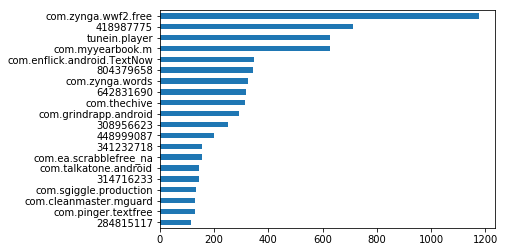

Column:  bidRequest_app_cat
Unique values:  167 

['IAB1', 'IAB9', 'IAB9-30', 'entertainment', 'games']       2021
['IAB1', 'IAB9']                                            1159
['IAB14']                                                    862
['IAB1', 'IAB1-6', 'entertainment', 'music']                 841
['IAB24', 'IAB3', 'social_networking', 'utilities']          496
['IAB1', 'IAB24', 'entertainment', 'social_networking']      458
['IAB1', 'IAB14', 'entertainment', 'lifestyle']              450
['IAB9-5', 'IAB9-30']                                        410
['IAB14', 'IAB7', 'healthcare_and_fitness', 'lifestyle']     325
['IAB1', 'IAB9', 'IAB14']                                    273
['IAB14', 'IAB24', 'lifestyle', 'social_networking']         258
['IAB9']                                                     250
['IAB1', 'entertainment']                                    181
['IAB9-30']                                                  159
['IAB3', 'utilities']                   

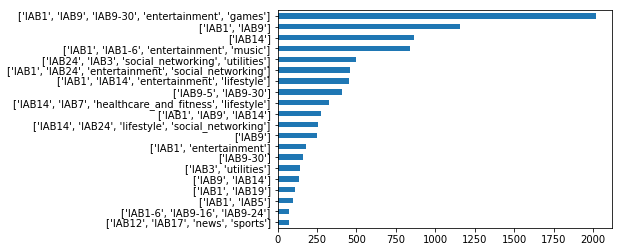

Column:  bidRequest_app_domain
Unique values:  164 

meetme.com                 627
tunein.com                 530
ea.com                     301
pinger.com                 249
talkatone.com              169
http://mkjigsaw.com        160
hcodemedia.com             147
cmcm.com                   137
tango.me                   133
viewster.com               116
criticalhitsoftware.com    108
eamobile.com                89
http://thechive.com/        87
musical.ly                  83
zynga.com                   75
apalon.com                  57
gosub60inc.com              54
Musical.ly                  54
astarsoftware.com           53
nextplus.me                 53
Name: bidRequest_app_domain, dtype: int64 



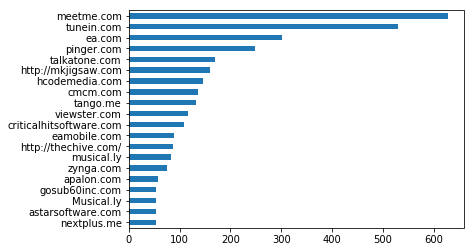

Column:  bidRequest_app_ext_nex_sdkv
Unique values:  73 

6.1.0-5323db4.a     699
6.1.0-222a9a3.i     425
6.1.0-222a9a3       317
5.3.0-c3980670.a    200
16.6                109
6.1.0-5323db4       106
6.2.0-72163df.i     103
6.3.0-b2ebd01        74
6.3.0-478bbd1        52
6.2.0-19e8a52.a      51
5.2.0-cc9dfc02.i     47
5.4.0-c325424f.a     40
5.4.1-c7e6da4b.i     39
5.6.3                38
6.3.0-478bbd1.i      38
3.5.0                33
19.7.0               32
2.6.0                21
6.0.1-30a1dfa.i      19
5.0.1-13.05.14.a     16
Name: bidRequest_app_ext_nex_sdkv, dtype: int64 



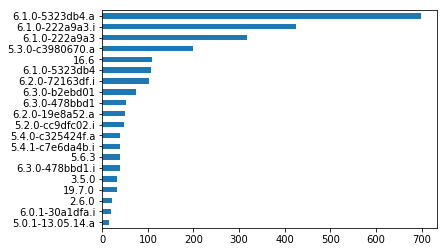

Column:  bidRequest_app_id
Unique values:  614 

1cb88d26e4c74248bf957e3bb9d0884d      1093
agltb3B1Yi1pbmNyDAsSA0FwcBj3n7YVDA     347
agltb3B1Yi1pbmNyDAsSA0FwcBjbm5EUDA     306
70578                                  300
agltb3B1Yi1pbmNyDAsSA0FwcBjq_6EUDA     297
agltb3B1Yi1pbmNyDAsSA0FwcBjRiOYSDA     292
7929d1a5c0964583a83795ffe81cebee       283
agltb3B1Yi1pbmNyDAsSA0FwcBjHn94TDA     282
agltb3B1Yi1pbmNyCwsSA0FwcBiJwSEM       250
29875                                  236
29888                                  189
c6f59c559f8d4f95b72e222160e75aa8       167
28120                                  160
70864                                  159
88232                                  156
4b7abd0c8455421ab3dbee36d07ce7f6       155
agltb3B1Yi1pbmNyDAsSA0FwcBj6kcoWDA     142
587639ed9d774044b673d31224eecf67       139
agltb3B1Yi1pbmNyDAsSA0FwcBj01OETDA     136
96370                                  132
Name: bidRequest_app_id, dtype: int64 



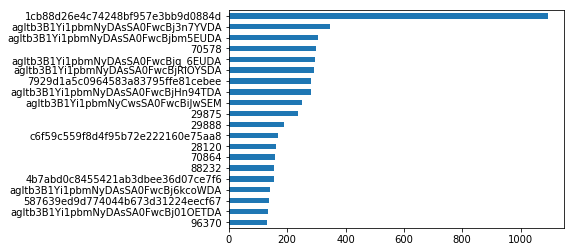

Column:  bidRequest_app_keywords
Unique values:  5 

Productivity                                                                                                   14
News                                                                                                            8
phones on three awings finality missed me an ya guesses mr ya miss miss final                                   1
car low say it aint so car parking at car no cars wanted places car cars two we by houses car houses no bad     1
Entertainment Fun Games Apps                                                                                    1
Name: bidRequest_app_keywords, dtype: int64 



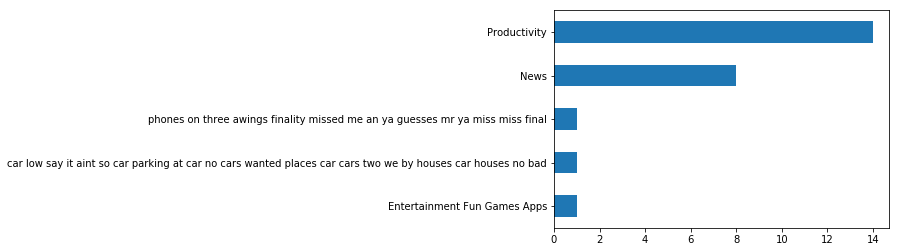

Column:  bidRequest_app_name
Unique values:  616 

Words With Friends 2 Android                    1093
TextNow Android                                  347
TuneIn Radio (Android)                           306
myyearbook Android                               300
TuneIn Radio                                     297
Grindr Android                                   292
Words With Friends 1 Android                     283
theCHIVE Android                                 282
Grindr iOS                                       250
TuneIn-USA-Android                               236
Words With Friends 2 iPhone                      167
MK Jigsaw-Jigsaw Collection HD-iPad              160
MYB Android 300x250                              159
myYearbook.com-MeetMe Android-320x50-US only     156
MFP iOS                                          155
TextNow iOS                                      142
Talkatone - Android                              141
Jigsaw Collection HD                            

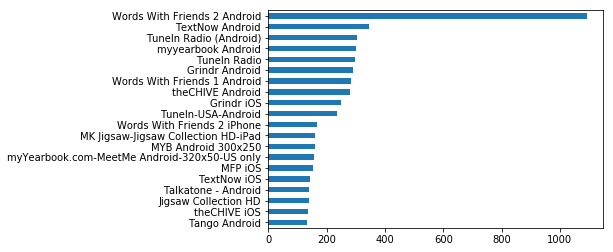

Column:  bidRequest_app_publisher_ext_nex_else
Unique values:  1 

0.0    4387
Name: bidRequest_app_publisher_ext_nex_else, dtype: int64 



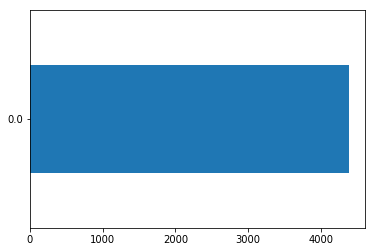

Column:  bidRequest_app_publisher_id
Unique values:  279 

eb99c87f16d44af380cca10c8691f91a                                   1763
agltb3B1Yi1pbmNyEAsSB0FjY291bnQYsv-PFAw                             714
19982                                                               693
agltb3B1Yi1pbmNyIgsSB0FjY291bnQiFTEwMTEyNzQwOTg4Njk0NTM4Njc4NAw     542
agltb3B1Yi1pbmNyEAsSB0FjY291bnQYq_imDww                             489
7580                                                                425
agltb3B1Yi1pbmNyEAsSB0FjY291bnQY2_3WEww                             418
17382                                                               381
agltb3B1Yi1pbmNyEAsSB0FjY291bnQY49yLBQw                             273
1120                                                                188
4499                                                                169
11532                                                               168
7723                                                                160
21074

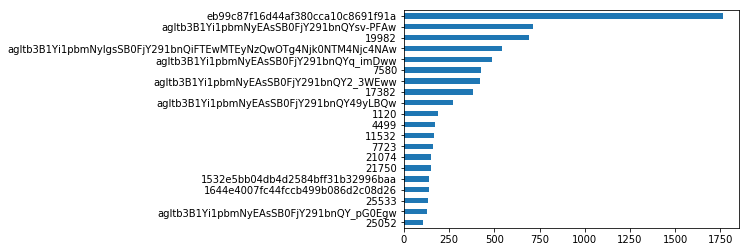

Column:  bidRequest_app_publisher_name
Unique values:  250 

Zynga                            1838
TuneIn                           1244
myYearbook.com                    693
Grindr LLC                        542
Resignation Media                 513
Enflick, Inc.                     489
EA Mobile                         381
VERAXEN MEDIA LTD                 299
My Fitness Pal                    273
IAC Search & Media Europe Ltd     193
Pinger, Inc.                      188
Talkatone                         169
Cydersoft / VideMob               168
Cheetah Mobile                    151
H Code Media, LLC                 149
H Code Media                      138
Tango                             133
Viewster                          116
Critical Hit Software, LLC        108
Gogii                             101
Name: bidRequest_app_publisher_name, dtype: int64 



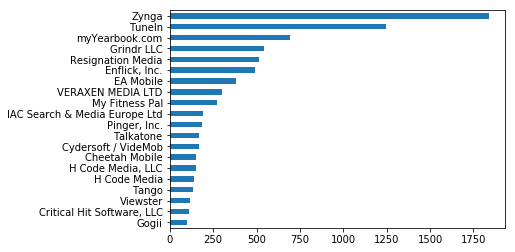

Column:  bidRequest_app_storeurl
Unique values:  355 

http://www.meetme.com/                                                                    459
http://itunes.apple.com/us/app/tunein-radio/id418987775?mt=8&uo=4                         297
http://itunes.apple.com/us/app/grindr-gay-bi-curious-guy/id308956623?mt=8&uo=4            250
https://play.google.com/store/apps/details?id=tunein.player                               236
https://itunes.apple.com/us/app/tunein-radio/id418987775                                  189
https://itunes.apple.com/us/app/new-words-with-friends/id804379658?mt=8&ign-mpt=uo%3D2    167
https://itunes.apple.com/us/app/jigsaw-collection-hd/id642831690?ls=1&mt=8                160
https://play.google.com/store/apps/details?id=com.myyearbook.m&hl=en                      156
https://itunes.apple.com/us/app/calorie-counter-diet-tracker/id341232718?mt=8&uo=4        155
https://play.google.com/store/apps/details?id=com.ea.scrabblefree_na&hl=en                154
http:

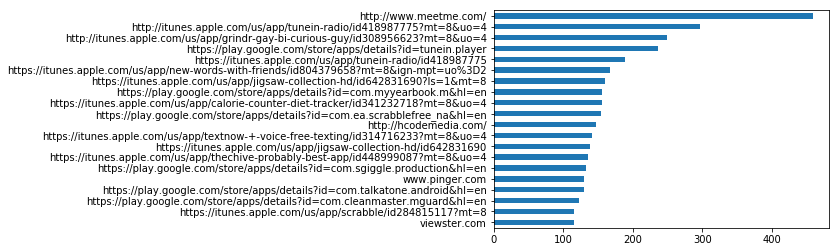

Column:  bidRequest_app_ver
Unique values:  475 

3.911     878
7.7.2     278
1.6.3     263
10.6      251
4.24.1    203
16.3      167
3.0.3     161
4.002     155
7.1.1     142
1.2.2     136
2.1.22    117
2.2.10    110
3.852     101
3.0.7      98
3.905      89
3.906      85
4.19.8     77
6.22.0     76
6.1.1      70
5.2.2      52
Name: bidRequest_app_ver, dtype: int64 



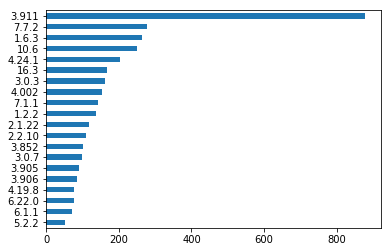

Column:  bidRequest_at
Unique values:  1 

2    10406
Name: bidRequest_at, dtype: int64 



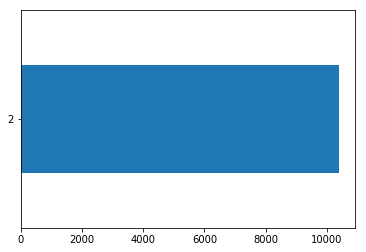

Column:  bidRequest_badv
Unique values:  226 

['wordswithfriends', 'zynga']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

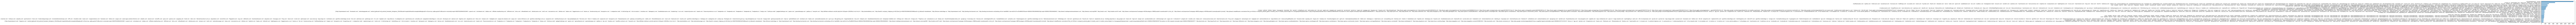

Column:  bidRequest_bcat
Unique values:  157 

['IAB25', 'IAB25-2', 'IAB26', 'IAB7-39', 'IAB9-9', 'IAB3-7']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  1645
['IAB26', 'IAB25', 'IAB24']                                                                                                                                                                                                                                                                           

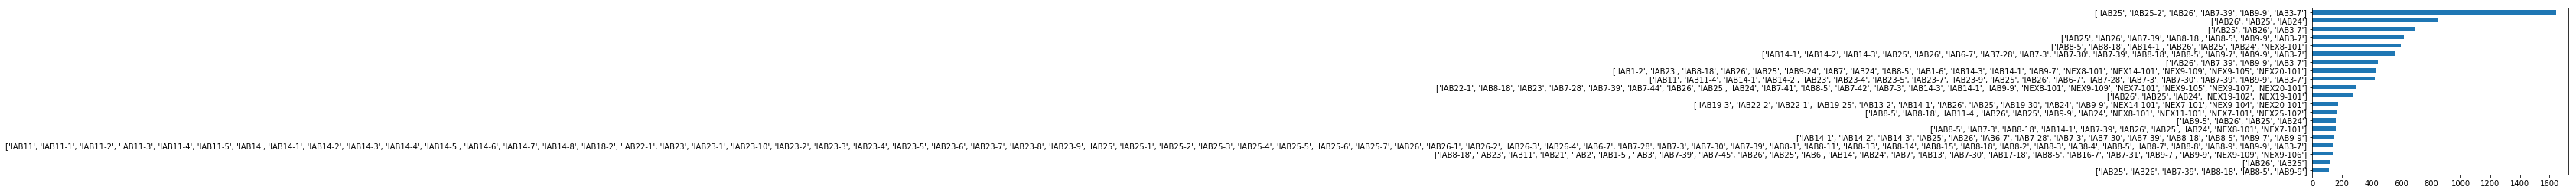

Column:  bidRequest_device_carrier
Unique values:  91 

WIFI        3808
311-480     1330
310-410     1034
310-260      862
310-120      492
T-MOBILE     420
VERIZON      191
311-870      183
SPRINT       131
AT&T         101
302-720       94
302-610       81
302-220       74
311-580       66
310-000       33
311-490       32
310-00        30
310-VZW       27
370-02        22
123-456       21
Name: bidRequest_device_carrier, dtype: int64 



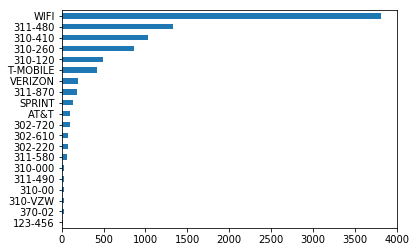

Column:  bidRequest_device_connectiontype
Unique values:  4 

2.0    7758
3.0    2490
0.0     150
1.0       1
Name: bidRequest_device_connectiontype, dtype: int64 



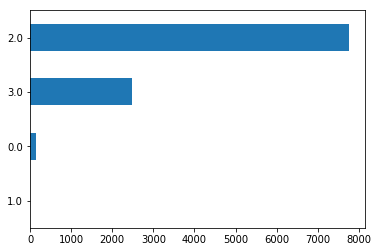

Column:  bidRequest_device_devicetype
Unique values:  2 

4.0    5176
5.0    1521
Name: bidRequest_device_devicetype, dtype: int64 



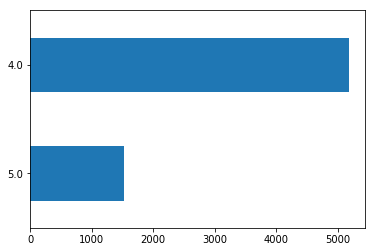

Column:  bidRequest_device_didmd5
Unique values:  128 

null                                3
8ce27123eabb92e8d6f4573c77c8a91a    2
7f82d99e5c1358f623532600b8df4b32    2
29938139089bc2becae2aebd319d3878    1
18f75c3588291d460f1fff906dc776fb    1
15c525f9956aac3fbe57555277406478    1
9f25b068b75d792457ce43da74afbc3d    1
b9de06e1c68bd933cf1d9f082926bf47    1
d5bc0a9f934b64514f12742a10f0d616    1
c5a32d9adf09692f302f1f1f79178097    1
f341feefbb6989e501ed2b276c351888    1
b481dbdf04244adc368c70cfbdef09a5    1
ba9fd8524d55bc2d0be368945d9ecbb4    1
01db1ba67666aa67e5cc3940bf77bba7    1
ff123c5f8c0e856887e57d3bdab63406    1
dcb550f5d98c6fee1bc7e108630865c8    1
31cb17289f876902b4387254599b3d2e    1
a3e77f3f227efc098bda43669e340a5d    1
b302ca5e1b134afaea588ac9168e7276    1
f5fcd3bbe7f1638ecfbfdc23f560ba8e    1
Name: bidRequest_device_didmd5, dtype: int64 



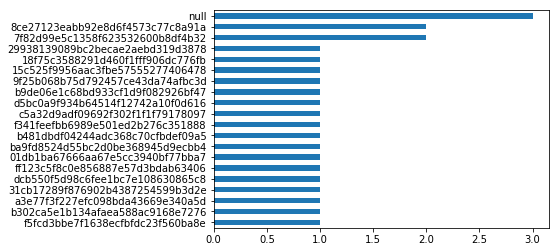

Column:  bidRequest_device_didsha1
Unique values:  144 

c1976429369bfe063ed8b3409db7c7e7d87196d9    6
null                                        3
a02166f97b6e8877fc617e4b643eb3d4460b43be    2
3e8b02cfade4177e82f4ba9b65667c5feabed4a4    2
8df6a478ec5402e601d1f31a3e9dfc86b08a140e    1
2e8d845eca96ad4c439ed322280af9b7764faad1    1
a2915489fcfa98e7223906dd23ff3afb77e8abc4    1
a9737eb72619cea8e58105ae1afd92a4061aa6fc    1
edceaa1a7b9125e4a87bde5375697cbd1bf74608    1
1ebd09e62cb3fa421173bf5249be04683f0c313f    1
9623e9ae00e79b0e3fd4ebad69800c27737dcf10    1
79cbf69a96f0d55fe8aa0542cd45af63c9e61835    1
194f6de0cdec85c1b61c463677b3267e08b974b1    1
80fd8b95bcf9e88e54eee3082d7948794954db25    1
837d7e0d7e5d878c2b84e7b0d31037b788beaded    1
414fa85ed43cdecb373f8b98bf956a10366c7ebd    1
581944c3ca04267757e1ce580c7d00f75eee9b8b    1
070eca3ac78b7413af28a478ed1f37f4e47f36bd    1
88213a3b55a1b02e10fa379a03d61cb969972684    1
81dcbb227e9b6189cb88146ce40539dd798dbbe9    1
Name: bidRequest_device

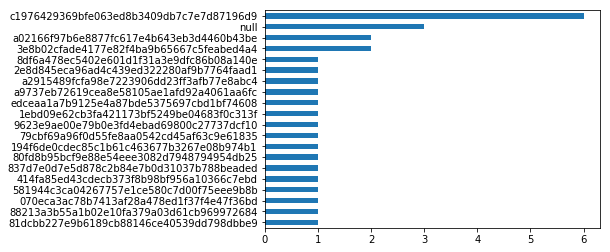

Column:  bidRequest_device_dnt
Unique values:  2 

0.0    8799
1.0     584
Name: bidRequest_device_dnt, dtype: int64 



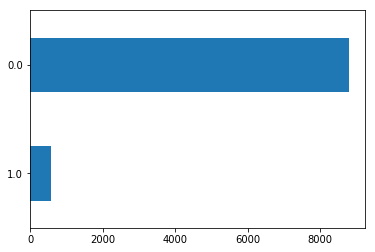

Column:  bidRequest_device_dpidmd5
Unique values:  544 

ea8a8d69a6fa85db979c1248830b5612    2
a743f16874c5c1c7221e9d03b2f5287d    2
7c0fe2450d9d1c9e0000000244773082    2
eb50cabb729960590a981ab9e38210bb    2
D1A451E2F81C8726E8686D3F455D09CE    2
9e6e7a4adacabf184a2c24960d991385    2
518c9e8a086255edb542e14677064c85    2
7a02a787d3b6fc69e225c5e64711449e    2
b6645bfd7efb26ba000f2b0d3f03abea    1
e15f4c87534d9dd2d1667293dc8f8a0c    1
f23701635135be5795b7ae77554730ad    1
95f602b2bac31df10000000215457084    1
dbee900e3b2803f3697df917568d373a    1
2ce3f3c999cafe6d5c131e602f1cfa8f    1
d02c1d5b4a5136862e399c92bc973666    1
b4b85a36a5a971fcff38e107b850bd1b    1
369ca558f104ddd61a1fcb9a097ad743    1
f9efe42618947d6a927deef65b87b903    1
407edc887d5b3a8dac7f10f9ab16897d    1
17b213029e1a08fa453e9a4a622a9f8f    1
Name: bidRequest_device_dpidmd5, dtype: int64 



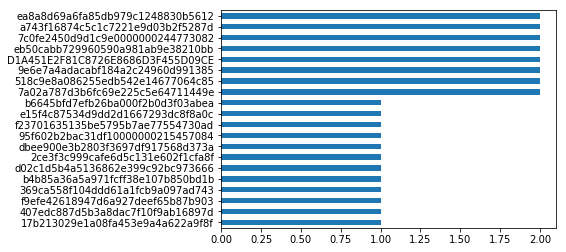

Column:  bidRequest_device_dpidsha1
Unique values:  895 

3f99fa7c4b733cad0ee31ff8e99dde5ca76bb49e    15
7964ac7df56b688beaaab4fdd575b3c9d018f337     6
b0ebe1534241c73c0a13efccae5a78424ac65d1d     2
3196d0b0f9452087e31f1ae341e26cebb69eb77c     2
e2acf57794fc85c763eafd5233824073da19e0c9     2
b8533eafdd26c4fbab0b29e9cef4209d4c25588e     2
8d420a58c2c22c44d996694103a56fad75c163e9     2
d4aa5c4607ba8df5bac4ae6d9f220e0262fffc27     2
5b16c411286da7fb73d3deab3c65aea403b7af55     2
b8ae77ee3be6e0a529c42fdbe946800305179c78     2
D0859EF9EEE87C7E9EB7D61016FF572E588CA666     2
6c212baa574d21e896201f5f5d992e1e84a05306     2
f449513ba2c7c91cfeeb25fa648c83ad73a31d3f     2
59d3553c151b6722a73992ca2657817e1dbe826c     2
d7c80021d5e95e69b6a5f1e8fe86bd24de4f3716     2
f3e956946c4bb36eef6ed49a2d4ec5ee7a4291e3     1
3f31433be7dec081cfaa7534bdf9a35c477414ae     1
26ed5df4-5c69-47c9-b8b6-ac1482a6f5c8         1
be647047ab3cbaec8d44e0aa6719bbc28e951f5f     1
63944f79aa4477c412b9e7623d9aecd9144e7537     1
Na

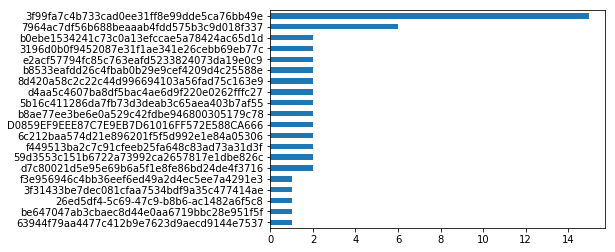

Column:  bidRequest_device_geo_country
Unique values:  13 

USA    9211
CAN    1101
DOM      41
JAM      16
TTO      14
BHS       5
HTI       4
BRB       4
VIR       4
ABW       2
SXM       2
LCA       1
VGB       1
Name: bidRequest_device_geo_country, dtype: int64 



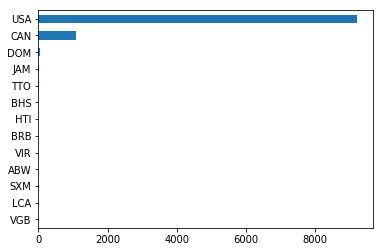

Column:  bidRequest_device_geo_metro
Unique values:  205 

501.0    656
803.0    403
602.0    265
524.0    263
504.0    255
511.0    232
506.0    229
618.0    198
623.0    188
505.0    163
528.0    158
807.0    157
534.0    153
819.0    131
539.0    118
510.0    113
753.0    112
517.0    106
527.0     98
613.0     98
Name: bidRequest_device_geo_metro, dtype: int64 



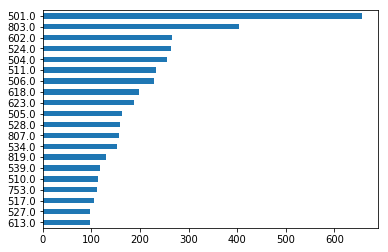

Column:  bidRequest_device_geo_region
Unique values:  77 

CA    839
TX    682
FL    616
NY    597
PA    376
GA    363
MI    360
OH    355
IL    343
NC    315
NJ    286
MA    246
ON    221
VA    202
IN    189
MD    182
WA    181
TN    176
MN    147
AZ    138
Name: bidRequest_device_geo_region, dtype: int64 



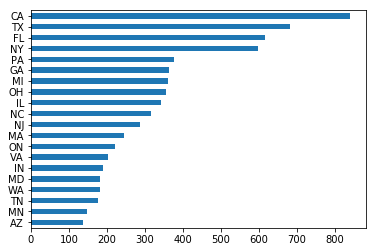

Column:  bidRequest_device_geo_type
Unique values:  2 

1.0    2501
2.0    2139
Name: bidRequest_device_geo_type, dtype: int64 



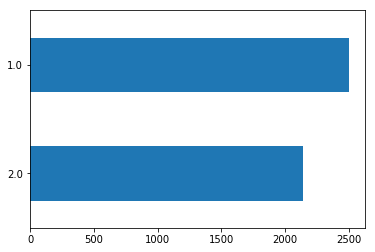

Column:  bidRequest_device_h
Unique values:  29 

1920.0    1007
2560.0     615
1280.0     605
1334.0     511
1136.0     508
960.0      267
854.0      238
2208.0     230
800.0      211
1536.0     203
1024.0     129
768.0      105
2048.0      71
480.0       68
2001.0      55
600.0       51
1080.0      44
1440.0      38
720.0       33
540.0       16
Name: bidRequest_device_h, dtype: int64 



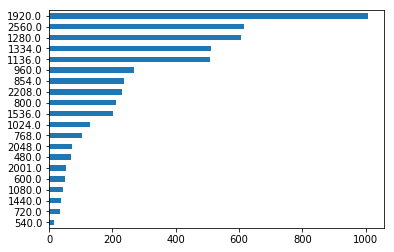

Column:  bidRequest_device_hwv
Unique values:  225 

iPhone 6               396
iPhone 6s              255
iPhone 5s (GSM)        196
iPhone 6+              155
iPhone 6s+             142
iPad 2 (WiFi)           74
iPhone                  61
iPhone 5c (GSM)         60
iPad Mini (WiFi)        58
iPad Air (WiFi)         54
iPhone 4S               54
iPad                    49
iPhone7,2               46
iPhone8,4               46
iPad Air 2 (WiFi)       42
iPad mini 2G (WiFi)     42
iPhone 5 (GSM)          36
iPad 4 (WiFi)           35
iPod                    32
iPhone6,1               29
Name: bidRequest_device_hwv, dtype: int64 



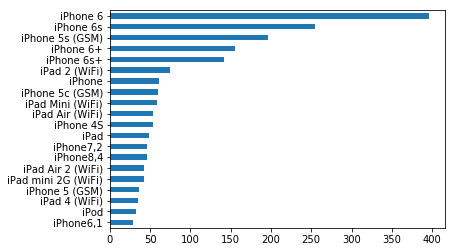

Column:  bidRequest_device_js
Unique values:  1 

1.0    10348
Name: bidRequest_device_js, dtype: int64 



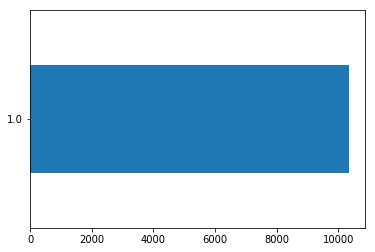

Column:  bidRequest_device_language
Unique values:  14 

en    6162
es     272
fr     114
pt      10
zh       8
ar       6
ru       5
ko       4
de       2
zz       2
nl       1
ja       1
hr       1
it       1
Name: bidRequest_device_language, dtype: int64 



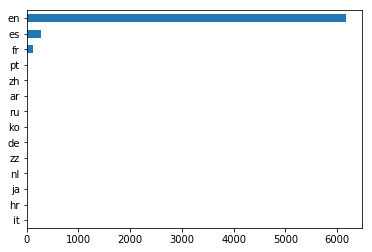

Column:  bidRequest_device_lmt
Unique values:  2 

0.0    3069
1.0     586
Name: bidRequest_device_lmt, dtype: int64 



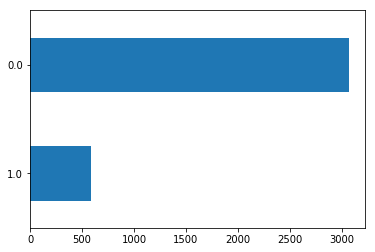

Column:  bidRequest_device_macmd5
Unique values:  2 

e3f5536a141811db40efd6400f1d0a4e    1
0F607264FC6318A92B9E13C65DB7CD3C    1
Name: bidRequest_device_macmd5, dtype: int64 



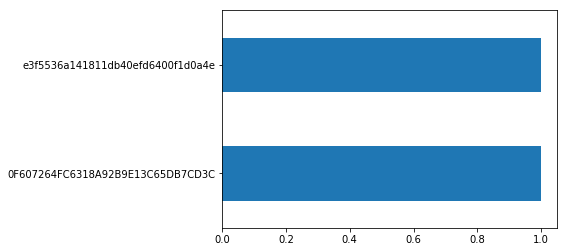

Column:  bidRequest_device_macsha1
Unique values:  4 

94abc6a0044c1beebfd7da3f53b6cba3ca57105f    1
87c0dd78e28aa4b85a562f4fb0124617fd741988    1
C1976429369BFE063ED8B3409DB7C7E7D87196D9    1
6024a02ea5577bcb6442a70d0bfa791935839db3    1
Name: bidRequest_device_macsha1, dtype: int64 



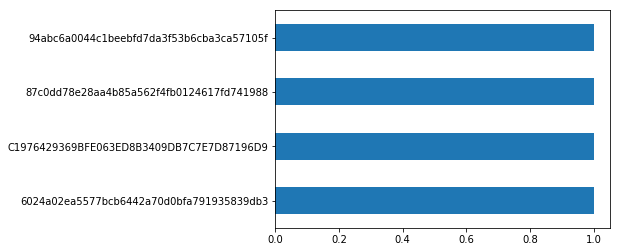

Column:  bidRequest_device_make
Unique values:  103 

Apple       3945
samsung     2017
Samsung      724
LGE          589
LG           469
motorola     270
HTC          231
Amazon       209
Sprint       119
ZTE          111
Motorola      63
TCL           58
kyocera       34
Coolpad       34
HUAWEI        30
BLU           29
Alcatel       27
zte           27
asus          26
Huawei        24
Name: bidRequest_device_make, dtype: int64 



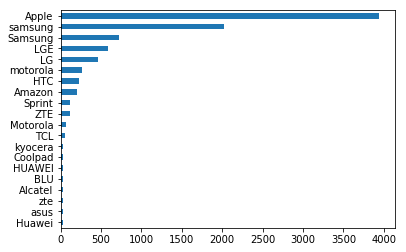

Column:  bidRequest_device_model
Unique values:  758 

iPhone              2509
iPad                1262
SM-G900P             158
SM-G730A             146
SM-G920V             118
SM-G900V             104
iPod Touch            98
iPod                  76
SCH-I545              72
SAMSUNG-SM-G900A      67
SM-G920P              66
LGMS330               63
XT1080                62
SM-G930V              61
KFFOWI                56
XT1585                50
SM-N900A              50
SM-N920V              45
SM-G935V              43
SM-G900T              42
Name: bidRequest_device_model, dtype: int64 



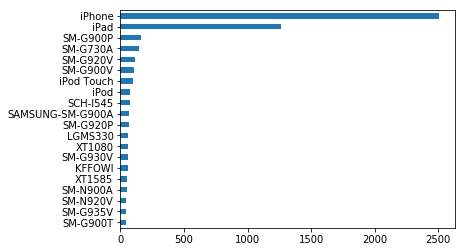

Column:  bidRequest_device_os
Unique values:  4 

Android    6439
iOS        3947
Windows      19
Linux         1
Name: bidRequest_device_os, dtype: int64 



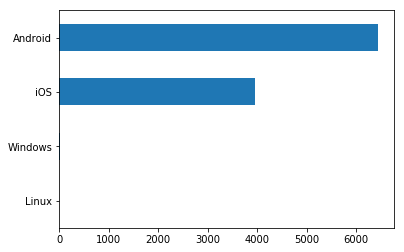

Column:  bidRequest_device_osv
Unique values:  99 

6.0.1    2205
5.1.1    1310
9.3.5    1298
9_3_5    1157
4.4.2     631
5.1       406
6.0       404
4.4.4     312
5.0.1     228
5.0.2     218
5.0       216
9_3_4     172
9.3.4     154
9_3_2     137
4.1.2     107
9.3.2     106
4.2.2      98
4.3        86
4.4.3      75
9.3.3      68
Name: bidRequest_device_osv, dtype: int64 



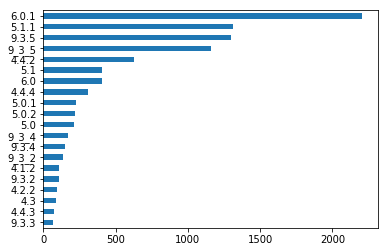

Column:  bidRequest_device_ppi
Unique values:  10 

326.0    48
240.0    46
160.0    39
480.0    33
320.0    30
213.0    21
640.0    18
163.0     7
420.0     5
560.0     2
Name: bidRequest_device_ppi, dtype: int64 



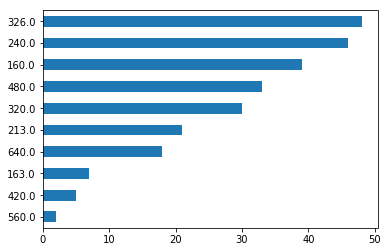

Column:  bidRequest_device_w
Unique values:  30 

1080.0    982
1440.0    610
640.0     598
750.0     511
720.0     491
480.0     398
1242.0    230
2048.0    203
540.0     177
1024.0    154
800.0     120
1280.0     84
1536.0     71
600.0      68
768.0      67
1920.0     55
1125.0     55
2560.0     44
854.0      29
320.0      28
Name: bidRequest_device_w, dtype: int64 



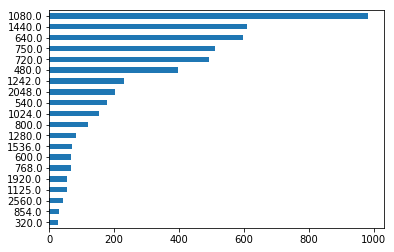

Column:  bidRequest_regs_coppa
Unique values:  2 

0.0    4613
1.0      55
Name: bidRequest_regs_coppa, dtype: int64 



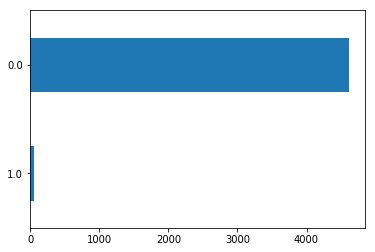

Column:  bidRequest_site_cat
Unique values:  4 

['IAB12', 'IAB15']                           186
['IAB17', 'IAB1', 'IAB12', 'IAB15']           89
['IAB14-1', 'IAB9-30', 'IAB9-7', 'IAB19']      5
['IAB1', 'IAB9']                               1
Name: bidRequest_site_cat, dtype: int64 



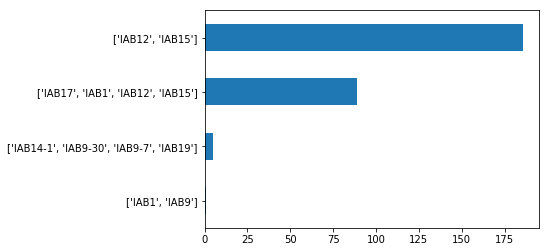

Column:  bidRequest_site_domain
Unique values:  4 

http://mobileposse.com    186
mobileposse.com            79
mocospace.com               5
hcodemedia.com              1
Name: bidRequest_site_domain, dtype: int64 



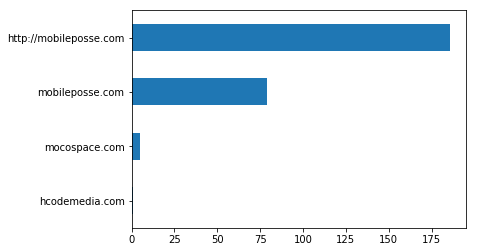

Column:  bidRequest_site_id
Unique values:  5 

23271.0    186
29810.0     79
43021.0     10
38884.0      5
73984.0      1
Name: bidRequest_site_id, dtype: int64 



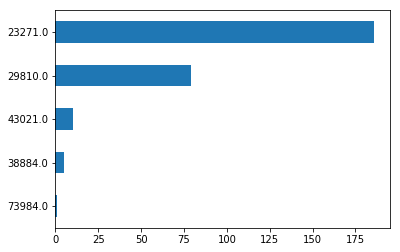

Column:  bidRequest_site_keywords
Unique values:  8 

Video,Trending,Viral,News,Links                  174
Games,Apps,Entertainment,Android,Downloads        28
Entertainment                                     27
Headlines,news                                    18
Entertainment,Fun,Games,Apps                      17
Events,Local,Entertainment,Music,Festival,Art      8
Entertainment,Movies,Television,Fun                1
Horoscope,Games,Entertainment                      1
Name: bidRequest_site_keywords, dtype: int64 



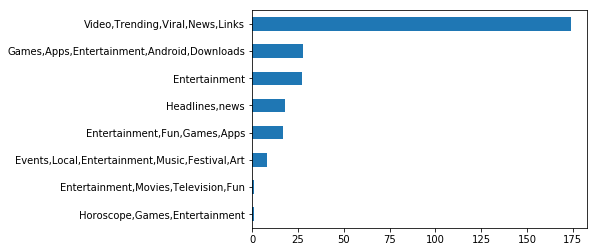

Column:  bidRequest_site_mobile
Unique values:  1 

1.0    281
Name: bidRequest_site_mobile, dtype: int64 



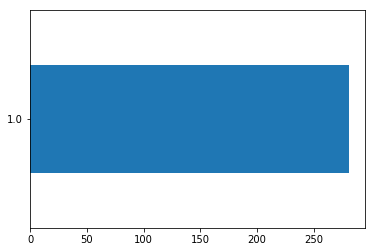

Column:  bidRequest_site_name
Unique values:  5 

MobilePosse-Weather-MobileWeb             186
MobilePosse-Aggregated-MobileWeb-Metro     79
CONVX-3e021d                               10
Mocospace- Mobile Web                       5
H Code Media-Mobile Web                     1
Name: bidRequest_site_name, dtype: int64 



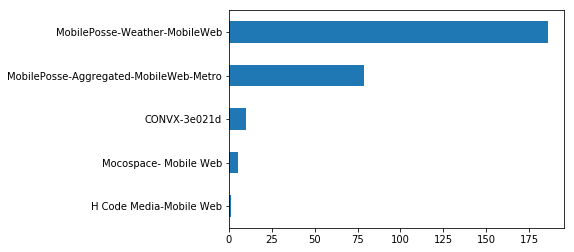

Column:  bidRequest_site_page
Unique values:  5 

/wk/profile-search.jsp                          2
/wk/online/online-main.jsp                      1
http://www.mocospace.com/wk/profile-view.jsp    1
/wk/offline/offline-main.jsp                    1
/wk/profile-home.jsp                            1
Name: bidRequest_site_page, dtype: int64 



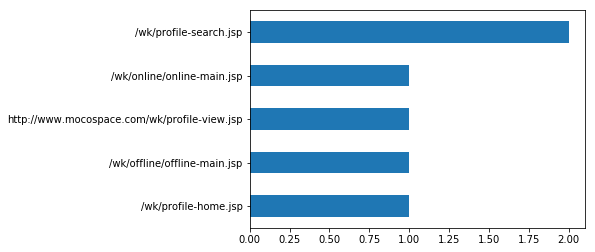

Column:  bidRequest_site_publisher_ext_nex_else
Unique values:  1 

0.0    281
Name: bidRequest_site_publisher_ext_nex_else, dtype: int64 



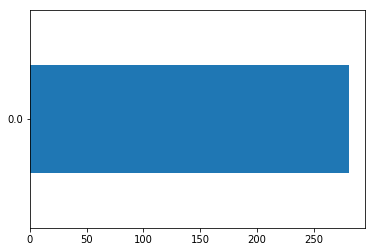

Column:  bidRequest_site_publisher_id
Unique values:  4 

5734.0     265
9999.0      10
665.0        5
21750.0      1
Name: bidRequest_site_publisher_id, dtype: int64 



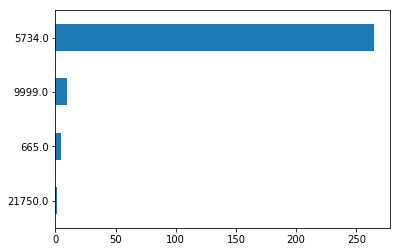

Column:  bidRequest_site_publisher_name
Unique values:  4 

MobilePosse            265
Conversion Exchange     10
JNJ Mobile INC           5
H Code Media, LLC        1
Name: bidRequest_site_publisher_name, dtype: int64 



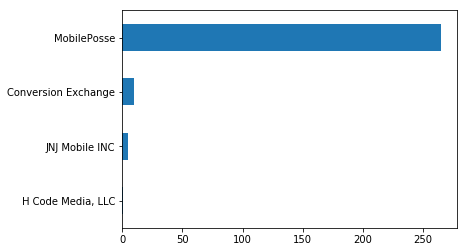

Column:  bidRequest_site_ref
Unique values:  5 

/wk/profile-search.jsp                          2
/wk/online/online-main.jsp                      1
http://www.mocospace.com/wk/profile-view.jsp    1
/wk/offline/offline-main.jsp                    1
/wk/profile-home.jsp                            1
Name: bidRequest_site_ref, dtype: int64 



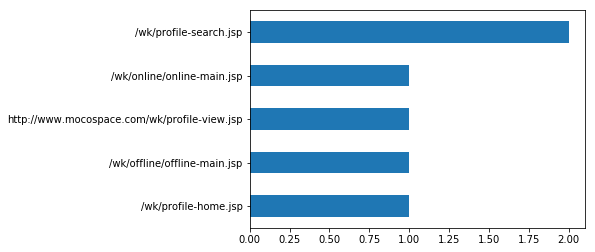

Column:  bidRequest_user_ext_nex_dma
Unique values:  4 

623.0    2
542.0    1
637.0    1
648.0    1
Name: bidRequest_user_ext_nex_dma, dtype: int64 



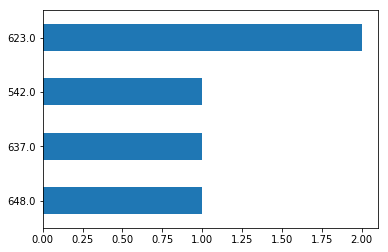

Column:  bidRequest_user_ext_nex_eth
Unique values:  2 

0.0    5
4.0    1
Name: bidRequest_user_ext_nex_eth, dtype: int64 



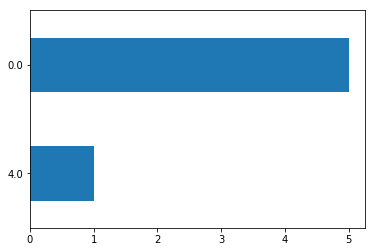

Column:  bidRequest_user_ext_nex_hhi
Unique values:  623 

23851.0    8
12083.0    7
23562.0    5
27078.0    4
27576.0    3
17498.0    3
73047.0    3
32969.0    3
47522.0    3
46729.0    3
41683.0    3
48523.0    2
31033.0    2
35205.0    2
30099.0    2
53636.0    2
37756.0    2
39840.0    2
36176.0    2
32068.0    2
Name: bidRequest_user_ext_nex_hhi, dtype: int64 



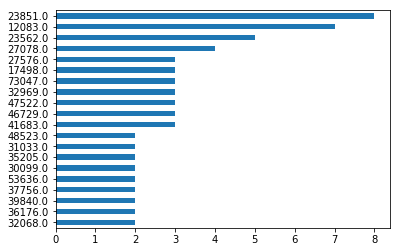

Column:  bidRequest_user_ext_nex_marital
Unique values:  1 

S    1
Name: bidRequest_user_ext_nex_marital, dtype: int64 



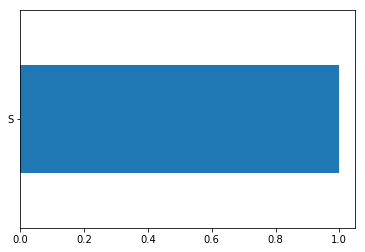

Column:  bidRequest_user_gender
Unique values:  3 

M    1036
F     382
O      34
Name: bidRequest_user_gender, dtype: int64 



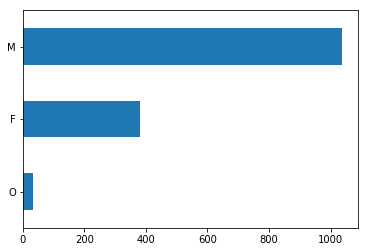

Column:  bidRequest_user_geo_city
Unique values:  548 

BROOKLYN       10
ATL             9
MIAMI           9
LOS ANGELES     8
San Jose        8
PHILA           8
HOUSTON         7
CHARLOTTE       6
BRONX           6
MANHATTAN       6
Columbus        5
CHICAGO         5
ALBANY          4
Miami           4
FLUSHING        4
Brooklyn        4
BRISTOL         4
BALTIMORE       4
DETROIT         4
ANAHEIM         4
Name: bidRequest_user_geo_city, dtype: int64 



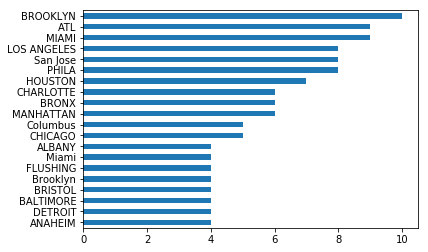

Column:  bidRequest_user_geo_country
Unique values:  2 

USA    2171
CAN     255
Name: bidRequest_user_geo_country, dtype: int64 



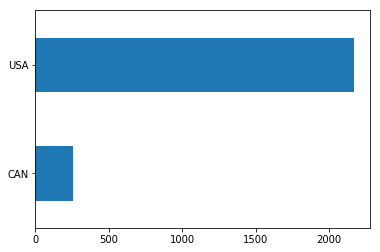

Column:  bidRequest_user_geo_region
Unique values:  51 

CA    86
FL    81
NY    64
GA    48
TX    43
OH    36
NC    33
PA    29
MI    29
NJ    24
VA    24
TN    19
MD    16
IL    15
MA    12
CO    11
IN    10
QC    10
SC     9
LA     9
Name: bidRequest_user_geo_region, dtype: int64 



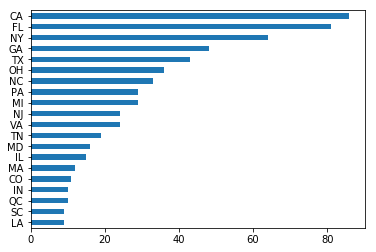

Column:  bidRequest_user_geo_type
Unique values:  1 

3.0    4483
Name: bidRequest_user_geo_type, dtype: int64 



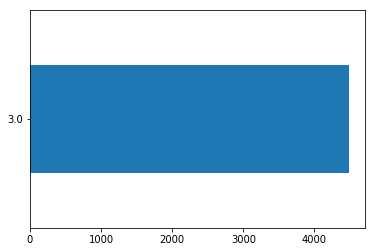

Column:  bidRequest_user_yob
Unique values:  54 

1970.0    101
1981.0     51
1989.0     49
1991.0     48
1992.0     48
1990.0     46
1995.0     38
1993.0     38
1998.0     34
1987.0     33
1988.0     30
1994.0     28
1997.0     26
1986.0     25
1985.0     24
1983.0     22
1980.0     21
1976.0     20
1982.0     18
1996.0     18
Name: bidRequest_user_yob, dtype: int64 



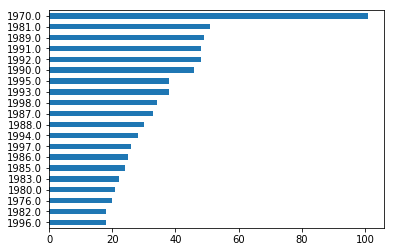

Column:  exchange
Unique values:  2 

Mopub     5738
Nexage    4668
Name: exchange, dtype: int64 



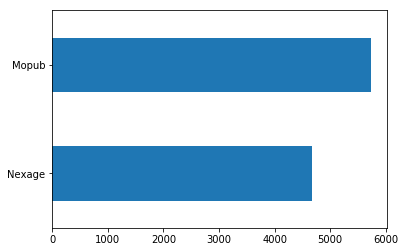

Column:  timestamp
Unique values:  165 

1473813300000    88
1473813417000    84
1473813332000    83
1473813372000    80
1473813281000    78
1473813397000    76
1473813362000    76
1473813299000    75
1473813344000    75
1473813308000    74
1473813319000    74
1473813292000    74
1473813356000    74
1473813363000    73
1473813370000    73
1473813380000    73
1473813349000    73
1473813355000    73
1473813316000    73
1473813272000    72
Name: timestamp, dtype: int64 



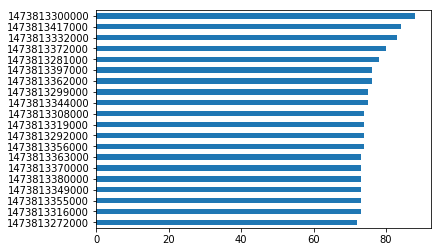

Column:  bidRequest_imp_type
Unique values:  3 

banner          9058
video            854
video,banner     494
Name: bidRequest_imp_type, dtype: int64 



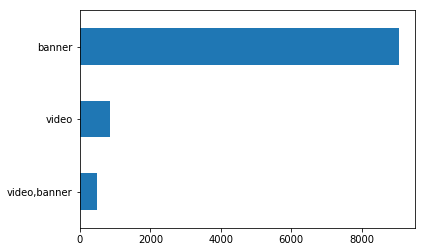

Column:  bidRequest_imp_instl
Unique values:  2 

0.0    9253
1.0    1152
Name: bidRequest_imp_instl, dtype: int64 



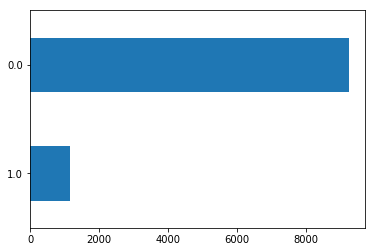

Column:  bidRequest_imp_bidfloor
Unique values:  361 

2.62     230
2.77     222
3.90     202
0.66     201
2.00     189
2.50     181
2.81     170
15.56    168
1.00     165
2.40     164
1.31     159
2.60     156
1.80     154
4.16     152
3.00     146
2.12     146
20.00    145
2.95     144
6.21     143
8.50     140
Name: bidRequest_imp_bidfloor, dtype: int64 



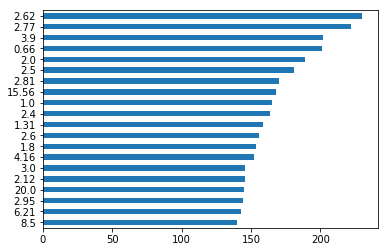

Column:  bidRequest_imp_displaymanager
Unique values:  10 

mopub                 6155
millennial            2275
web                   1421
pinger                 185
admarvel               129
Nexage-SDK-Android      53
aerserv                 15
rovio                   13
spotxchange              8
Nexage-SDK-iOS           7
Name: bidRequest_imp_displaymanager, dtype: int64 



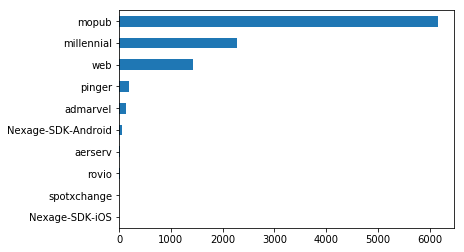

Column:  bidRequest_imp_displaymanagerver
Unique values:  126 

4.5.1               1533
6.1.0-5323db4.a      699
4.6.0                537
4.7.1                526
6.1.0-222a9a3.i      425
4.3.0                334
4.6.1                328
6.1.0-222a9a3        317
4.2.0                313
3.3.0                312
4.8.0                286
4.7.0                202
5.3.0-c3980670.a     200
4.4.0                177
4.0.0                127
16.6                 109
6.1.0-5323db4        106
6.2.0-72163df.i      103
4.9.0 kit             97
4.9.0                 83
Name: bidRequest_imp_displaymanagerver, dtype: int64 



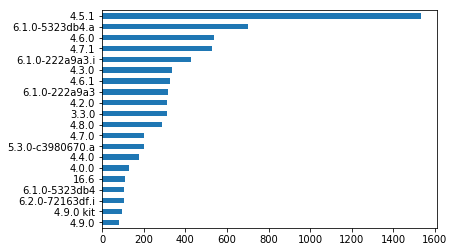

Column:  bidRequest_imp_tagid
Unique values:  454 

946f80d41b104b26882908123fd9879f       766
22f25a4a812711e295fa123138070049       297
agltb3B1Yi1pbmNyDQsSBFNpdGUYtebmEgw    291
521c23877bf64187945671c9a8cf44ab       287
agltb3B1Yi1pbmNyDQsSBFNpdGUYqePXEww    280
agltb3B1Yi1pbmNyDAsSBFNpdGUYorkhDA     204
agltb3B1Yi1pbmNyDQsSBFNpdGUY2umjFAw    190
agltb3B1Yi1pbmNyDQsSBFNpdGUY5bygFAw    188
634d87a27e364dce88b8c1680e9345fa       155
agltb3B1Yi1pbmNyDQsSBFNpdGUY0pbLFgw    132
9e9add51b0d442e2ac1e24910f824896       131
d38738aa461a43ea8c80dc2db884b61c       129
agltb3B1Yi1pbmNyDQsSBFNpdGUYzMLVEww    129
769d09c9e8284d6a817eb6505ec27a75       116
agltb3B1Yi1pbmNyDQsSBFNpdGUY2crkFAw    110
c8ad57fca8bc46f1abbe5c997524eddd       109
e30e45f276e14a4d9b41ed298b0777b2       105
ce64c870119c4b13b72a3dbaa3b4d008        82
e7443abeec074a5885353e32d78667a8        81
7a7222ce4f464fbb85578d63fd38c7aa        79
Name: bidRequest_imp_tagid, dtype: int64 



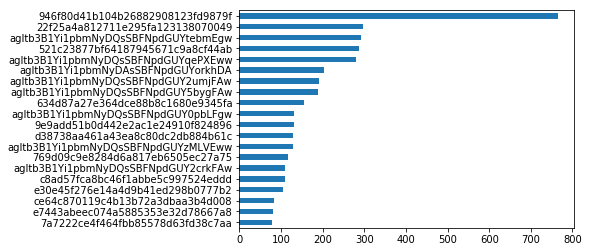

Column:  bidRequest_imp_secure
Unique values:  2 

0.0    4779
1.0    1304
Name: bidRequest_imp_secure, dtype: int64 



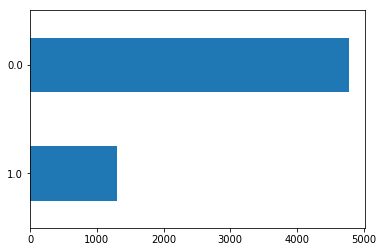

Column:  bidRequest_imp_video_linearity
Unique values:  1 

1.0    1348
Name: bidRequest_imp_video_linearity, dtype: int64 



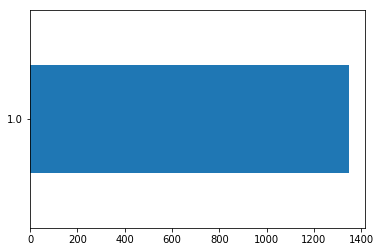

Column:  bidRequest_imp_video_w
Unique values:  5 

320.0     787
300.0     409
480.0      85
1024.0     36
768.0      31
Name: bidRequest_imp_video_w, dtype: int64 



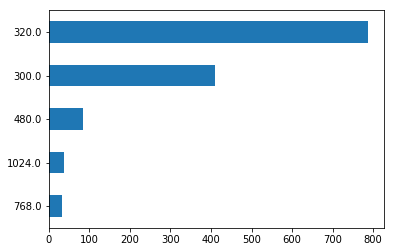

Column:  bidRequest_imp_video_h
Unique values:  5 

480.0     787
250.0     409
320.0      85
768.0      36
1024.0     31
Name: bidRequest_imp_video_h, dtype: int64 



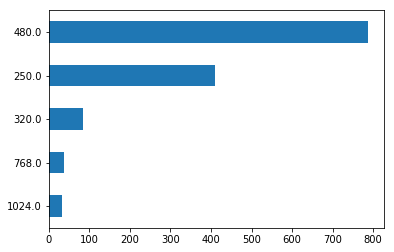

Column:  bidRequest_imp_video_minduration
Unique values:  2 

0.0     907
16.0    441
Name: bidRequest_imp_video_minduration, dtype: int64 



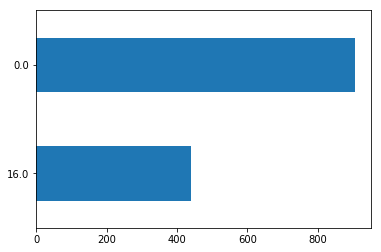

Column:  bidRequest_imp_video_maxduration
Unique values:  3 

30.0     754
120.0    579
15.0      15
Name: bidRequest_imp_video_maxduration, dtype: int64 



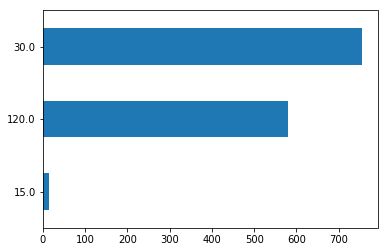

Column:  bidRequest_imp_video_maxbitrate
Unique values:  1 

1200.0    769
Name: bidRequest_imp_video_maxbitrate, dtype: int64 



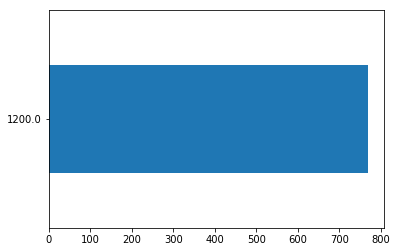

Column:  bidRequest_imp_video_mimes
Unique values:  3 

None                                                                            9058
['video/mp4', 'video/3gpp']                                                     1191
['video/3gpp', 'video/3gpp2', 'video/mp4', 'video/quicktime', 'video/x-m4v']     157
Name: bidRequest_imp_video_mimes, dtype: int64 



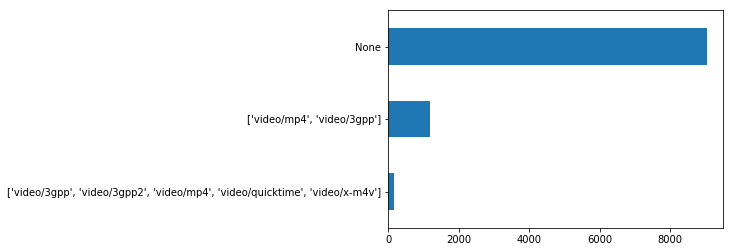

Column:  bidRequest_imp_video_startdelay
Unique values:  1 

0.0    429
Name: bidRequest_imp_video_startdelay, dtype: int64 



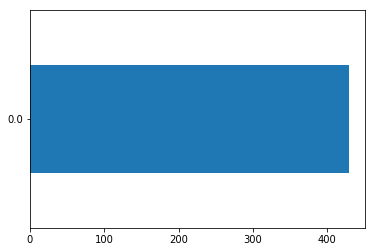

Column:  bidRequest_imp_video_pos
Unique values:  1 

7.0    769
Name: bidRequest_imp_video_pos, dtype: int64 



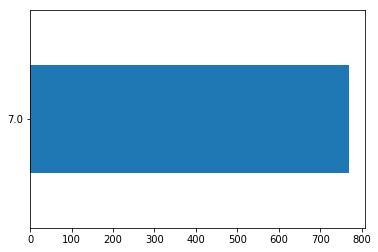

Column:  bidRequest_imp_video_api
Unique values:  4 

None      9834
[3, 5]     550
[3]         17
[2]          5
Name: bidRequest_imp_video_api, dtype: int64 



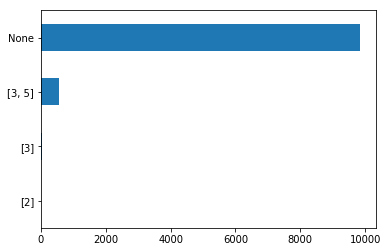

Column:  bidRequest_imp_video_battr
Unique values:  22 

None                               9565
[1, 2, 3, 8, 9, 10, 14]             448
[1, 3, 8, 9, 12, 14]                116
[3, 8, 9, 10, 14]                    63
[2, 3, 8, 9, 10, 14]                 44
[3, 4, 5, 8, 9, 12, 14]              44
[1, 2, 3, 6, 8, 9, 12]               31
[16]                                 23
[10, 14]                             19
[3, 8, 10, 14]                       14
[1, 3, 6, 8, 9, 10, 11, 12, 14]      10
[9, 10, 11, 12]                       7
[1, 3, 8, 9, 10, 13, 14]              5
[9, 12, 6, 7]                         5
[3, 4, 5, 8, 9, 10, 12, 14]           4
[1, 3, 4, 5, 8, 9, 10, 14]            2
[1, 3, 8, 9, 10, 11, 12, 14]          1
[1, 2, 6, 7, 11, 13, 15, 16]          1
[3, 8, 9, 10, 13, 14]                 1
[10]                                  1
Name: bidRequest_imp_video_battr, dtype: int64 



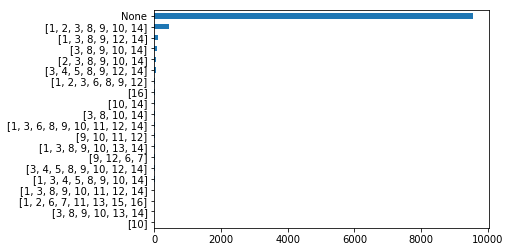

Column:  bidRequest_imp_video_companiontype
Unique values:  3 

None         9827
[1, 2, 3]     510
[1]            69
Name: bidRequest_imp_video_companiontype, dtype: int64 



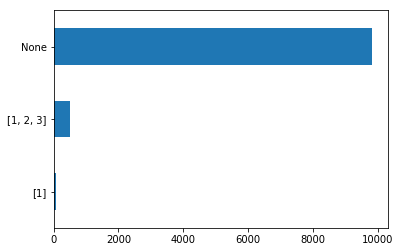

Column:  bidRequest_imp_video_protocols
Unique values:  4 

None            9058
[5, 2]           769
[2, 5, 3, 6]     510
[2, 5]            69
Name: bidRequest_imp_video_protocols, dtype: int64 



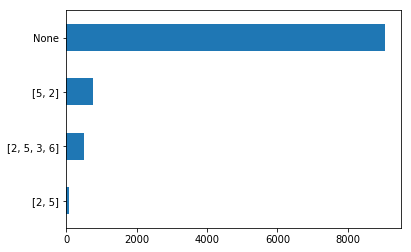

Column:  bidRequest_imp_video_playbackmethod
Unique values:  2 

None         9637
[1, 2, 3]     769
Name: bidRequest_imp_video_playbackmethod, dtype: int64 



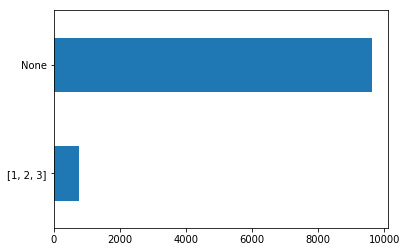

Column:  bidRequest_imp_video_ext_skipoffset
Unique values:  4 

7.0     606
5.0      28
15.0      5
1.0       1
Name: bidRequest_imp_video_ext_skipoffset, dtype: int64 



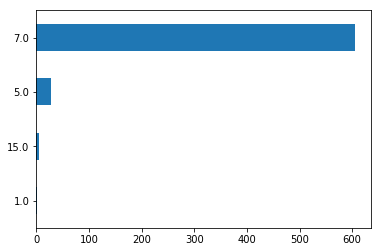

Column:  bidRequest_imp_video_ext_skippable
Unique values:  2 

1.0    640
0.0    129
Name: bidRequest_imp_video_ext_skippable, dtype: int64 



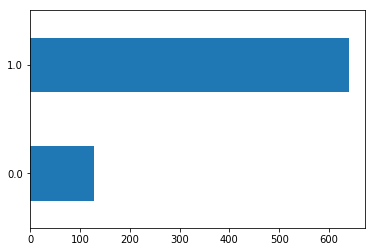

Column:  bidRequest_imp_banner_api
Unique values:  4 

[3, 5]    5203
None      2452
[5, 3]    2385
[3]        366
Name: bidRequest_imp_banner_api, dtype: int64 



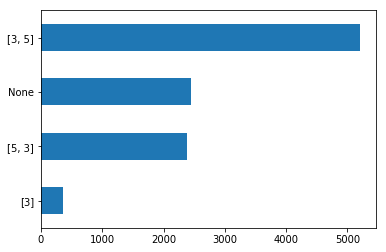

Column:  bidRequest_imp_banner_w
Unique values:  16 

320.0     7023
728.0     1155
300.0      993
168.0      198
768.0       48
1024.0      47
480.0       45
319.0       23
727.0        7
216.0        4
375.0        3
299.0        2
468.0        1
411.0        1
414.0        1
360.0        1
Name: bidRequest_imp_banner_w, dtype: int64 



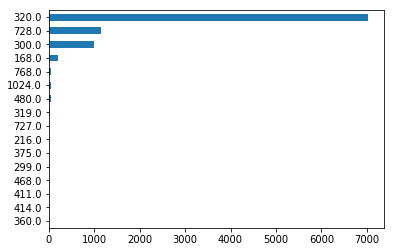

Column:  bidRequest_imp_banner_h
Unique values:  14 

50.0      6430
90.0      1167
250.0      990
480.0      594
28.0       198
768.0       47
320.0       45
1024.0      36
49.0        26
89.0         7
52.0         5
36.0         4
249.0        2
60.0         1
Name: bidRequest_imp_banner_h, dtype: int64 



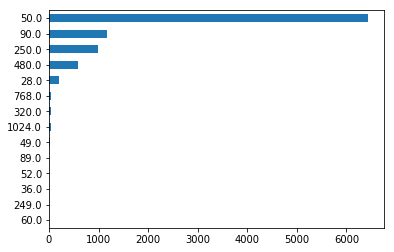

Column:  bidRequest_imp_banner_pos
Unique values:  5 

1.0    6074
5.0    1449
0.0    1395
4.0     416
7.0     218
Name: bidRequest_imp_banner_pos, dtype: int64 



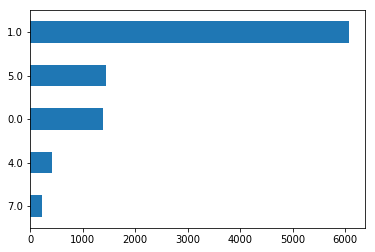

Column:  bidRequest_imp_banner_battr
Unique values:  94 

None                                2546
[3, 6, 7, 8, 9, 10, 14]             1248
[1, 2, 3, 8, 9, 10, 13, 14, 6]      1246
[1, 3, 4, 5, 6, 7, 8, 9, 10, 14]     487
[3, 8, 9, 10, 14, 6]                 460
[3, 4, 5, 8, 9, 12]                  457
[1, 3, 8, 9, 10, 14, 6]              436
[1, 3, 6, 7, 8, 9, 10, 14]           397
[2, 3, 8, 9, 10, 14, 6]              316
[1, 2, 3, 8, 9, 10, 14]              302
[1, 2, 3, 4, 8, 9, 10]               300
[1, 3, 5, 6, 7, 9, 10, 14]           277
[2, 3, 6, 7, 8, 9, 10, 14]           195
[1, 2, 3, 6, 8, 9, 12]               174
[3, 4, 5, 10, 8, 9]                  159
[10, 14]                             129
[1, 3, 5, 6, 8, 9, 14]               113
[1, 3, 5, 6, 7, 9, 14, 10]           103
[3, 8, 10, 14, 6]                     87
[3, 4, 5, 8, 9, 12, 6, 7]             86
Name: bidRequest_imp_banner_battr, dtype: int64 



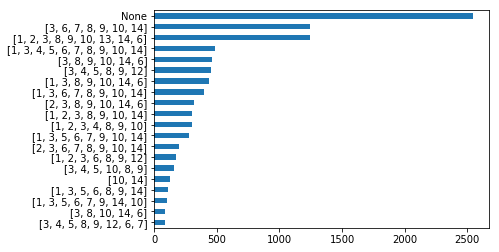

Column:  bidRequest_imp_banner_btype
Unique values:  8 

[4]       5590
[1]       2135
None      1756
[1, 4]     438
[]         386
[3]         61
[1, 3]      39
[1, 2]       1
Name: bidRequest_imp_banner_btype, dtype: int64 



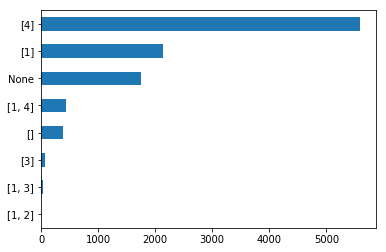

Column:  bidRequest_imp_pmp_deals
Unique values:  215 

None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         6505
[{'id': '1462976892784335237'}, {'id': '1426863662579673123'}, {'id': '1435781799382281797'}, {'id': '1439493870945656671'}, {'id': '1470157686126985553'}, {'id': '1470158145002148858'}, {'id': '1470662301764889496'}]                                                                                                                                                                                                     

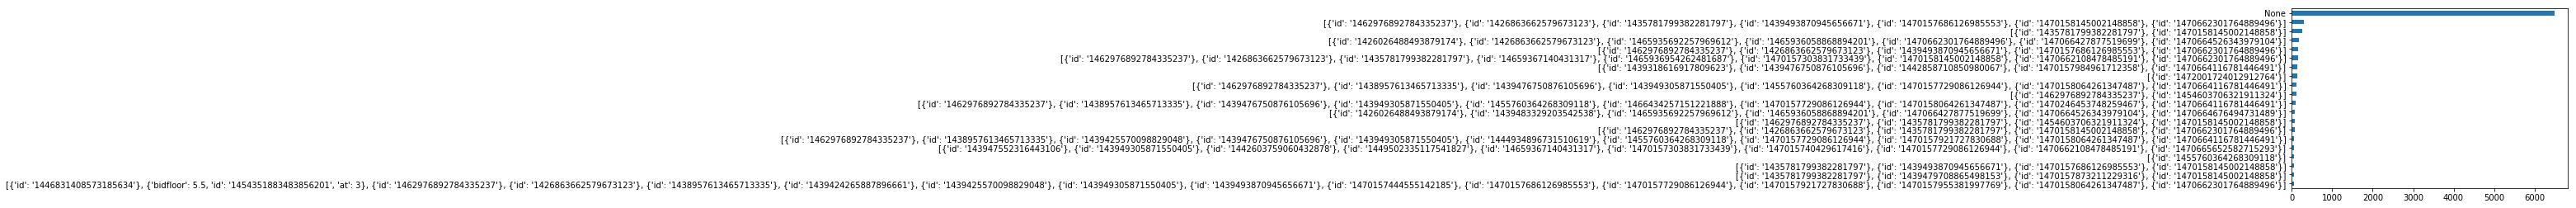

Column:  bidRequest_imp_ext_brsrclk
Unique values:  1 

1.0    5551
Name: bidRequest_imp_ext_brsrclk, dtype: int64 



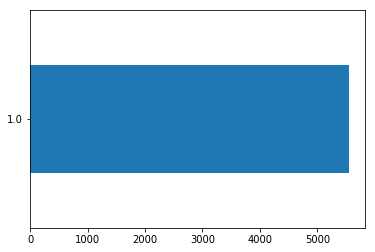

Column:  bidRequest_imp_ext_dlp
Unique values:  1 

1.0    4990
Name: bidRequest_imp_ext_dlp, dtype: int64 



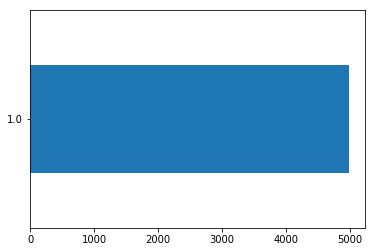

Column:  bidRequest_imp_ext_nex_screen
Unique values:  3 

0.0    4229
4.0     428
1.0      11
Name: bidRequest_imp_ext_nex_screen, dtype: int64 



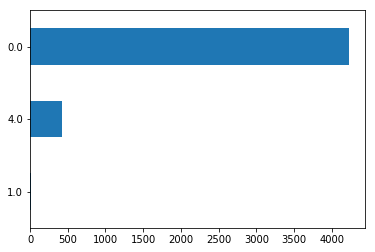

Column:  bidRequest_imp_ext_nex_sd
Unique values:  11 

1.0     182
0.0      26
2.0      25
3.0      19
10.0     14
4.0      12
5.0      12
6.0       8
8.0       3
9.0       1
7.0       1
Name: bidRequest_imp_ext_nex_sd, dtype: int64 



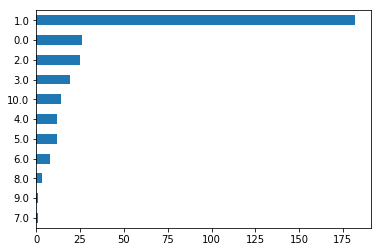

['Unnamed: 0', 'bidRequest_device_geo_city', 'bidRequest_device_geo_lat', 'bidRequest_device_geo_lon', 'bidRequest_device_geo_zip', 'bidRequest_device_ifa', 'bidRequest_device_ip', 'bidRequest_device_ua', 'bidRequest_id', 'bidRequest_imp', 'bidRequest_user_geo_zip', 'bidRequest_user_id', 'bidRequest_user_keywords', 'bidRequest_imp_id']


In [13]:
not_included = []

for column in bid_requests.columns:
    if type(bid_requests[column][0]) != list and len(bid_requests[column].value_counts()) < 2000:
        print("Column: ", column)
        print("Unique values: ", len(bid_requests[column].value_counts()), "\n")
        print(bid_requests[column].value_counts().head(20), "\n")
        plt.figure()
        bid_requests[column].value_counts().head(20).plot(kind='barh')
        plt.gca().invert_yaxis()
        plt.show()
    else:
        not_included.append(column)
        
print(not_included)

In [14]:
for col in bid_requests.columns:
    try:
        bid_requests[col].value_counts()
    except TypeError:
        print(col)
#bid_requests['bidRequest_imp_video_api'].value_counts()
#bid_requests['bidRequest_imp_video_api'].value_counts()


In [15]:
# adSize is a string of form "[width]x[height]".  Mutate into numerical adWidth, adHeight, adArea columns
dimensions = clicks['adSize'].str.split('x')
clicks['adWidth'], clicks['adHeight'] = pd.to_numeric(dimensions.str.get(0)), pd.to_numeric(dimensions.str.get(1))
clicks['adArea'] = clicks['adWidth'] * clicks['adHeight']